# POST GRADUATE PROGRAM IN DATA SCIENCE AND ENGINEERING JANUARY 2023 - ONLINE

# Domain : Predictive Analytics in the field of Transportation/ Urban Mobility

# GROUP 8 : Analysis on Yellow Taxis and Congessions in the Newyork City

<b>Presented by:</b>
* Keren Melinda V</br>
* Lakshmi Priya</br>
* Liviya Sekar</br>
* Ritartha Chakraborty</br>
* Sriram S</br> 

<b>Led by Sriram S</b></br>
<b>Mentored by Mohit Sahu</b></br>

<b>Problem Statement</b></br>

One of the major issues faced by the population of New York is the traffic congestion in the city during the rush hours which in week days falls between 07-10 hrs and 16-20hrs. The rush hours in weekends will vary based on major events happening in the city such concerts, major sporting events etc. As per the tom tom traffic index, due to the congestion average ride hour exceeds by approx. 12-17 minutes. This is a major problem which needs attention and right intervention.

<b>Data Collection</b></br>
The data is extracted from the Newyork Taxi & Limousine Commission website - https://www.nyc.gov/site/tlc/index.page. The data contains 32,88,250 rows and 19 columns including vendorID, ratecodeID, payment type, passenger count, pickup datetime, dropoff datetime, and fare details etc., which were collected for the month of April 2023. The additional data which consists of borough, zone and service zone details of new york city.

<b>Data Description</b></br>
<i><b>VendorID</i></b> - A code indicating the TPEP provider that provided the record. (1= Creative Mobile Technologies, LLC; 2= VeriFone Inc.)</br>
<i><b>tpep_pickup_datetime</i></b> - The date and time when the meter was engaged.</br>
<i><b>tpep_dropoff_datetime</i></b> - The date and time when the meter was disengaged.</br> 
<i><b>Passenger_count</i></b> - The number of passengers in the vehicle. This is a driver-entered value.</br>
<i><b>Trip_distance</i></b> - The elapsed trip distance in miles reported by the taximeter.</br>
<i><b>PULocationID</i></b> - TLC Taxi Zone in which the taximeter was engaged.</br>
<i><b>DOLocationID</i></b> - TLC Taxi Zone in which the taximeter was disengaged.</br>
<i><b>RateCodeID</i></b> - The final rate code in effect at the end of the trip. (1= Standard rate, 2=JFK, 3=Newark, 4=Nassau or Westchester, 5=Negotiated fare, 6=Group ride)</br>
<i><b>Store_and_fwd_flag</i></b> - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.(Y= store and forward trip, N= not a store and forward trip)</br>
<i><b>Payment_type</i></b> - A numeric code signifying how the passenger paid for the trip. (1= Credit card, 2= Cash, 3= No charge, 4= Dispute, 5= Unknown, 6= Voided trip)</br>
<i><b>Fare_amount</i></b> - The time-and-distance fare calculated by the meter.</br>
<i><b>Extra</i></b> - Miscellaneous extras and surcharges. Currently, this only includes the $0.50 and $1 rush hour and vernight charges.</br>
<i><b>MTA_tax</i></b> - \\$0.50 MTA tax that is automatically triggered based on the metered rate in use. </br>
<i><b>Improvement_surcharge</i></b> - \\$0.30 improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015.</br>
<i><b>Tip_amount</i></b> - This field is automatically populated for credit card tips. Cash tips are not included.</br>
<i><b>Tolls_amount</i></b> - Total amount of all tolls paid in trip.</br>
<i><b>Total_amount</i></b> - The total amount charged to passengers. Does not include cash tips.</br>
<i><b>Congestion_Surcharge</i></b> - Total amount collected in trip for NYS congestion surcharge. </br>
<i><b>Airport_fee</i></b> - $1.25 for pick up only at LaGuardia and John F. Kennedy Airports.</br>

<b>Data Exploration</b>

In [2]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None

from scipy import stats

<b>Importing the raw data</b>

In [3]:
# importing parquet file of APR 2023 yellow taxi dataset
# Since raw data is in parquet format installing pyarrow for data conversion and high efficiency

# !{sys.executable} -m pip install pyarrow 
#parquet_file = 'yellow_tripdata_2023-04.parquet'
#df = pd.read_parquet(parquet_file) # reading the parquet file

# Specify the output CSV file name
#csv_output = 'yellow_taxi_cab.csv'

# Save the DataFrame to the CSV file using tab as the separator and excluding the index column
#df.to_csv(csv_output, index=False, sep='\t')

#df.head() #  display the firt five rows

In [5]:
# Reading the Raw dataset
df = pd.read_csv('yellow_taxi_cab.csv', sep='\t')

<b>Importing additional data to support the analysis</b>

In [6]:
# to merge lookup location ids
locations= pd.read_csv('taxi+_zone_lookup.csv') # importing additional data

df = df.merge(locations,how='left',left_on='PULocationID',right_on='LocationID')
df = df.rename(columns={'Borough':'PU_Borough','Zone':'PU_Zone','service_zone':'PU_service_zone'})
df.drop(columns='LocationID',inplace = True)
df = df.merge(locations,how='left',left_on='DOLocationID',right_on='LocationID')
df = df.rename(columns={'Borough':'DO_Borough','Zone':'DO_Zone','service_zone':'DO_service_zone'})
df.drop(columns='LocationID',inplace = True)

In [7]:
# shape of raw data
df.shape

(3288250, 25)

The dataset contains 32,88,250 rows and 25 columns.

In [10]:
# checking for missing/null values
count = df.isna().sum() 
percent = count/len(df)*100

missing_df = pd.concat((count, percent), axis = 1, keys = ['count', 'percent'])

missing_df

count   percent
VendorID                   0  0.000000
tpep_pickup_datetime       0  0.000000
tpep_dropoff_datetime      0  0.000000
passenger_count        90690  2.758002
trip_distance              0  0.000000
RatecodeID             90690  2.758002
store_and_fwd_flag     90690  2.758002
PULocationID               0  0.000000
DOLocationID               0  0.000000
payment_type               0  0.000000
fare_amount                0  0.000000
extra                      0  0.000000
mta_tax                    0  0.000000
tip_amount                 0  0.000000
tolls_amount               0  0.000000
improvement_surcharge      0  0.000000
total_amount               0  0.000000
congestion_surcharge   90690  2.758002
Airport_fee            90690  2.758002
PU_Borough                 0  0.000000
PU_Zone                 2160  0.065688
PU_service_zone        36145  1.099217
DO_Borough                 0  0.000000
DO_Zone                13082  0.397841
DO_service_zone        51612  1.569589

In [12]:
# checking datatype of the columns
df.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
Airport_fee              float64
PU_Borough                object
PU_Zone                   object
PU_service_zone           object
DO_Borough                object
DO_Zone                   object
DO_service_zone           object
dtype: object

<b>Data Cleaning</b>

<b>Dropping missing values</b>

In [16]:
# DROPPING THE NULL VALUES
df = df.dropna()

In [17]:
# df shape after removing null values
df.shape

(3143655, 25)

1,44,595 rows which contained null values were removed from the dataframe.

<b>Datatype Conversion</b>

In [13]:
# date time dtype conversion
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [18]:
# Dtype conversion
df['VendorID']=df['VendorID'].astype(object)
df['passenger_count']=df['passenger_count'].astype(int)
df['RatecodeID']=df['RatecodeID'].astype(object)
df['payment_type']=df['payment_type'].astype(object)

In [19]:
# checking datatype of the columns after dtype conversion
df.dtypes

VendorID                         object
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int32
trip_distance                   float64
RatecodeID                       object
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                     object
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
Airport_fee                     float64
PU_Borough                       object
PU_Zone                          object
PU_service_zone                  object
DO_Borough                       object
DO_Zone                          object
DO_service_zone                  object


<b>Data Filtration</b></br>
Filter the data corresponding to weekday rush hours.

In [20]:
# Filtering the first fortnight
df = df[(df['tpep_pickup_datetime'].dt.day <= 14) & (df['tpep_dropoff_datetime'].dt.day <= 14)]

In [21]:
# Filtering only the rush hours 
df= df[df['tpep_pickup_datetime'].dt.hour.between(7,9) | df['tpep_pickup_datetime'].dt.hour.between(16,19)]

In [22]:
# Removing the weekends from dataframe
dates= [1,2,8,9,15,16]
df= (df[(~df['tpep_pickup_datetime'].dt.day.isin(dates))  & (~df['tpep_dropoff_datetime'].dt.day.isin(dates))])

In [23]:
# Removing the May month rows
df = df[(df['tpep_pickup_datetime'].dt.month == 4) & (df['tpep_dropoff_datetime'].dt.month == 4)]

In [24]:
# shape after data filtration
df.shape

(404642, 25)

<b>Feature Extraction</b></br>
Creating seven new features such as trip_duration_secs, pickup_date, dropoff_date, pickup_hour, drop_hour, pickup_day, dropoff_day.

In [25]:
# extracting trip duration in seconds
df['trip_duration_secs'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds()

# extracting pickup date
df['pickup_date'] = df['tpep_pickup_datetime'].dt.date  

# extracting dropoff date
df['dropoff_date'] = df['tpep_dropoff_datetime'].dt.date  

# extracting pickup hour
df['pickup_hour']=df['tpep_pickup_datetime'].dt.hour 

# extracting drop off hour
df['drop_hour']=df['tpep_dropoff_datetime'].dt.hour  

# extracting pickup day
df['pickup_day']=df['tpep_pickup_datetime'].dt.day_name() 

# extracting drop off day
df['dropoff_day']=df['tpep_dropoff_datetime'].dt.day_name() 

<b>Data Preprocessing</b>

In [45]:
# dropping 63 rows which has 0 total amount
df = df[df['total_amount'] != 0] 

# dropping 3361 rows which has negative total amount
df = df[df['total_amount'] > 0] 

# dropping 7593 rows which has 0 passenger count
df = df[df['passenger_count'] != 0] 

# dropping 2731 rows which has incorrect ratecodeID (99)
df = df[df['RatecodeID'] != 99] 

# dropping 3893 rows which has 0 trip distance
df = df[df['trip_distance'] != 0] 

# dropping 3501 rows which has fare amount less than 3
df = df[df['fare_amount'] >= 3] 

# dropping 238 rows which has 0 improvement surcharge
df = df[df['improvement_surcharge'] != 0] 

# dropping the unknown locations Id rows
df = df[~((df['PULocationID'].isin([264,265])) | (df['DOLocationID'].isin([264,265])))]

# passge count 8 anomaly is removed
df.drop(df[df['passenger_count']==8].index,inplace=True)

# dropping 3742 rows with  trip duration less than 60secs
df=df[df['trip_duration_secs']>60]

# trip duration cannot exceed more than 10 hrs as per the nyc limits
df.drop(df[df['trip_duration_secs']> 36000].index,inplace=True) # dropping 255 rows

# the max distance would be around 2o mile while will take an average duration of about min 45 to max 1h:30 min
# hence we are dropping 293 trips got droppped off around 12 am which is an anomaly
df.drop(df[df['tpep_pickup_datetime'].dt.date != df['tpep_dropoff_datetime'].dt.date].index, inplace=True)

# dropping 43 rows with more than 10000 secs with congestion surcharge 0
df.drop(df[(df['trip_duration_secs'] > 10000) & (df['congestion_surcharge'] == 0)].index, inplace=True)

# dropping 5 rows with more than 1000 miles
df.drop(df[df['trip_distance'] >1000].index, inplace=True)

# (5 sec, 0.05 miles, 300 fare) ,(0.18,24,fare-890),(0.38,82,350),(0.38,56704,664.5,same pickup and drop)  rows can be dropped
df.drop(index=df[(df.fare_amount== 300) & (df.trip_distance== 0.05) & (df.trip_duration_secs== 5)].index,inplace=True)
df.drop(index=df[(df.fare_amount== 890) & (df.trip_distance== 0.18) & (df.trip_duration_secs== 24)].index,inplace=True)
df.drop(index=df[(df.fare_amount== 350) & (df.trip_distance== 0.38) & (df.trip_duration_secs== 82)].index,inplace=True)
df.drop(index=df[(df.fare_amount== 664.5) & (df.trip_distance== 0.38) & (df.trip_duration_secs== 56704)].index,inplace=True)

# For same PU and DO locations where location id 132 on 159 rows the fare is 70 which is flat rate from 132 to manhattan 
# therefore these rows can be dropped as we are not sure of the desination.
df.drop(index=df[(df['PULocationID']==132) & (df['DOLocationID']==132) & (df['fare_amount']==70)].index,inplace=True)

#improvement surcharge
#where improvement surcharge is 0 (262)
#250 '0' in congestion surcharge
#236 '0' in trip distance
#7 '0' passengers
#68 '0' fare amounts
#254 '0' mta tax
# so these can be dropped (as there were no discernable pattern)
df.drop(index = df[df['improvement_surcharge'] == 0].index, inplace = True)


In [46]:
#shape of data after cleaning
df.shape

(386411, 32)

In [47]:
#where improvement surcharge in 0.3(162)
# other things seem to be normal and nothing is discernable
#this can be considered as a mistake of wrong collection by the driver and can be imputed
# also, even if some pattern pattern is hidden the 162 rows is miniscule to say whether it is not a coincidence
df['improvement_surcharge'] = np.where((df['improvement_surcharge'] == 0.3), 1, df['improvement_surcharge'])

In [48]:
# Column extra
# we observed for vendor Id 1, the congestion surcharge and the airport fee were being added in extras. 
# we subtracted the amount in extras 
df['extra'] = np.where(df['VendorID']==1,df['extra']-df['congestion_surcharge']-df['Airport_fee'],df['extra'])

# After that for extras we still see that are values other than 2.50,0.0,7.5,5.0(correct values for extras)
# There are 1418(rows) other values which seem to be anomaly 
# There are few rows with anomaly so it can be dropped 
df=df[df['extra'].isin([2.50,0.00,5.00,7.50])]

In [49]:
# Imputing mta tax with 0.5 where there were 0
df['mta_tax']=np.where(df['mta_tax']==0,0.5,df['mta_tax'])

In [50]:
# column fare amount
#two fares for ratecode id 2 are 69.5 and 78.25 - can be imputed to 70 (flat rate)
df['fare_amount']=np.where((df.RatecodeID==2) & (df.fare_amount.isin([69.50,78.25])),70.0,df.fare_amount)

In [51]:
#below have congestion surcharge as 2.5
#if the pickup starts from airport(132/138/70) and the drop off is in the same Borough(Queens) impute it with zero.
#if the pickup starts from airport(132/138/70) and the drop off is in the Borough Brooklyn impute it with zero.
#no imputation required for pickup starting from airport(132/138/70) and the drop off is in the Borough Bronx
#any pick up and drop locations within the same borough with less and medium level trip distance can be imputed with 0
#any pick up and drop locations between different boroughs with with less trip distance can be imputed with 0

df['congestion_surcharge']=np.where(((df.congestion_surcharge==2.5) & (df.PULocationID.isin([132,138,70])) & (df.DO_Borough=='Queens') & (df.trip_distance<30)), 0, df.congestion_surcharge)
df['congestion_surcharge']=np.where(((df.congestion_surcharge==2.5) & (df.PULocationID.isin([132,138,70])) & (df.DO_Borough=='Brooklyn')), 0, df.congestion_surcharge)
df['congestion_surcharge']= np.where(((df.congestion_surcharge==2.5) & (df['PU_Borough'] == df['DO_Borough']) & (df['PU_Borough']!='Manhattan') & (df['DO_Borough']!='Manhattan') & (df['trip_distance'] <5)),0,df['congestion_surcharge'])
df['congestion_surcharge']= np.where(((df.congestion_surcharge==2.5) & (df['PU_Borough'] != df['DO_Borough']) & (df['PU_Borough']!='Manhattan') & (df['DO_Borough']!='Manhattan') & (df['trip_distance'] <1)),0,df['congestion_surcharge'])


In [52]:
#changing the tips in the cash amount to 0, as the column will only consist of tips made using other modes of payment
df['tip_amount']=np.where(((df.payment_type == 2) & (df.tip_amount!= 0)),0,df.tip_amount)

In [53]:
#Airport_fee

#started from manhattan - 10 are 70 dollars fare - these might have been between the jfk airport and manhattan
df.drop(index= df[(df['Airport_fee']==1.25) & (df.PU_Borough=='Manhattan') & (df.fare_amount==70)].index,inplace=True)

#other 6 are much far from the jfk and lagaurdia - airport fee can be imputed with 0
df['Airport_fee']=np.where(((df['Airport_fee']==1.25) & (df.PU_Borough=='Manhattan') & (df.fare_amount!=70)),0,df['Airport_fee'])

#other occurances where the trip is not starting from 132,138,70 can be imputed with 0
df['Airport_fee']=np.where(((df['Airport_fee']==1.25) & ~(df['PULocationID'].isin([132,138,70]))),0,df['Airport_fee'])

#all the other occurances where the trip is starting from 132,138,70 can be imputed with 1.75
df['Airport_fee']=np.where(((df['Airport_fee']==1.25) & (df['PULocationID'].isin([132,138,70]))),1.75,df['Airport_fee'])

In [54]:
#imputing wrong values present for vendor id 2 in total_amount
df['total_check']= np.round(df.fare_amount+df.extra+df.mta_tax+df.tip_amount+df.tolls_amount+df.improvement_surcharge+df.congestion_surcharge+df.Airport_fee,2)
df['difference']= np.round(df['total_check']-df['total_amount'],2)
df['total_amount'] = np.where(((df.difference!=0)),df.total_check,df.total_amount)

<b>Dropping Insignificant Features</b>

In [55]:
#dropping the Total check Column
df = df.drop('total_check', axis=1)

#dropping the difference Column
df = df.drop('difference', axis=1)

In [56]:
# filtering only week 1 data for further analysis
week1 = [3,4,5,6,7]
hours = [16,17,18,19]
taxidf1 = df[(df['tpep_pickup_datetime'].dt.day.isin(week1)) & (df['tpep_pickup_datetime'].dt.hour.isin(hours))]
taxidf1.shape

(132030, 32)

<b>Outlier Detection</B>

In [57]:
df_num = taxidf1.select_dtypes(include='number')

# Check for outliers using descriptive statistics
# Calculate the 25th (Q1) and 75th (Q3) percentiles
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the upper and lower bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Check for outliers
outliers = (df_num < lower_bound) | (df_num > upper_bound)

# Print the columns with outliers
print("Columns with outliers:")
print(outliers.any())

Columns with outliers:
passenger_count           True
trip_distance             True
PULocationID             False
DOLocationID             False
fare_amount               True
extra                     True
mta_tax                  False
tip_amount                True
tolls_amount              True
improvement_surcharge    False
total_amount              True
congestion_surcharge      True
Airport_fee               True
trip_duration_secs        True
pickup_hour              False
drop_hour                False
dtype: bool


In [58]:
numerical_columns = taxidf1.select_dtypes(include='number')

# Check for outliers using descriptive statistics
# Calculate the 25th (Q1) and 75th (Q3) percentiles
Q1 = numerical_columns.quantile(0.25)
Q3 = numerical_columns.quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the upper and lower bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Check for outliers
outliers = (numerical_columns < lower_bound) | (numerical_columns > upper_bound)

# Print information about potential outliers in each numerical column
print("Outlier Information:")
for col in outliers.columns:
    num_outliers = outliers[col].sum()
    total_values = len(outliers)
    percentage_outliers = (num_outliers / total_values) * 100
    print(f"{col}: {num_outliers} outliers ({percentage_outliers:.2f}% of total)")

Outlier Information:
passenger_count: 32470 outliers (24.59% of total)
trip_distance: 16320 outliers (12.36% of total)
PULocationID: 0 outliers (0.00% of total)
DOLocationID: 0 outliers (0.00% of total)
fare_amount: 13773 outliers (10.43% of total)
extra: 11885 outliers (9.00% of total)
mta_tax: 0 outliers (0.00% of total)
tip_amount: 8457 outliers (6.41% of total)
tolls_amount: 9459 outliers (7.16% of total)
improvement_surcharge: 0 outliers (0.00% of total)
total_amount: 14426 outliers (10.93% of total)
congestion_surcharge: 6929 outliers (5.25% of total)
Airport_fee: 10383 outliers (7.86% of total)
trip_duration_secs: 9371 outliers (7.10% of total)
pickup_hour: 0 outliers (0.00% of total)
drop_hour: 0 outliers (0.00% of total)


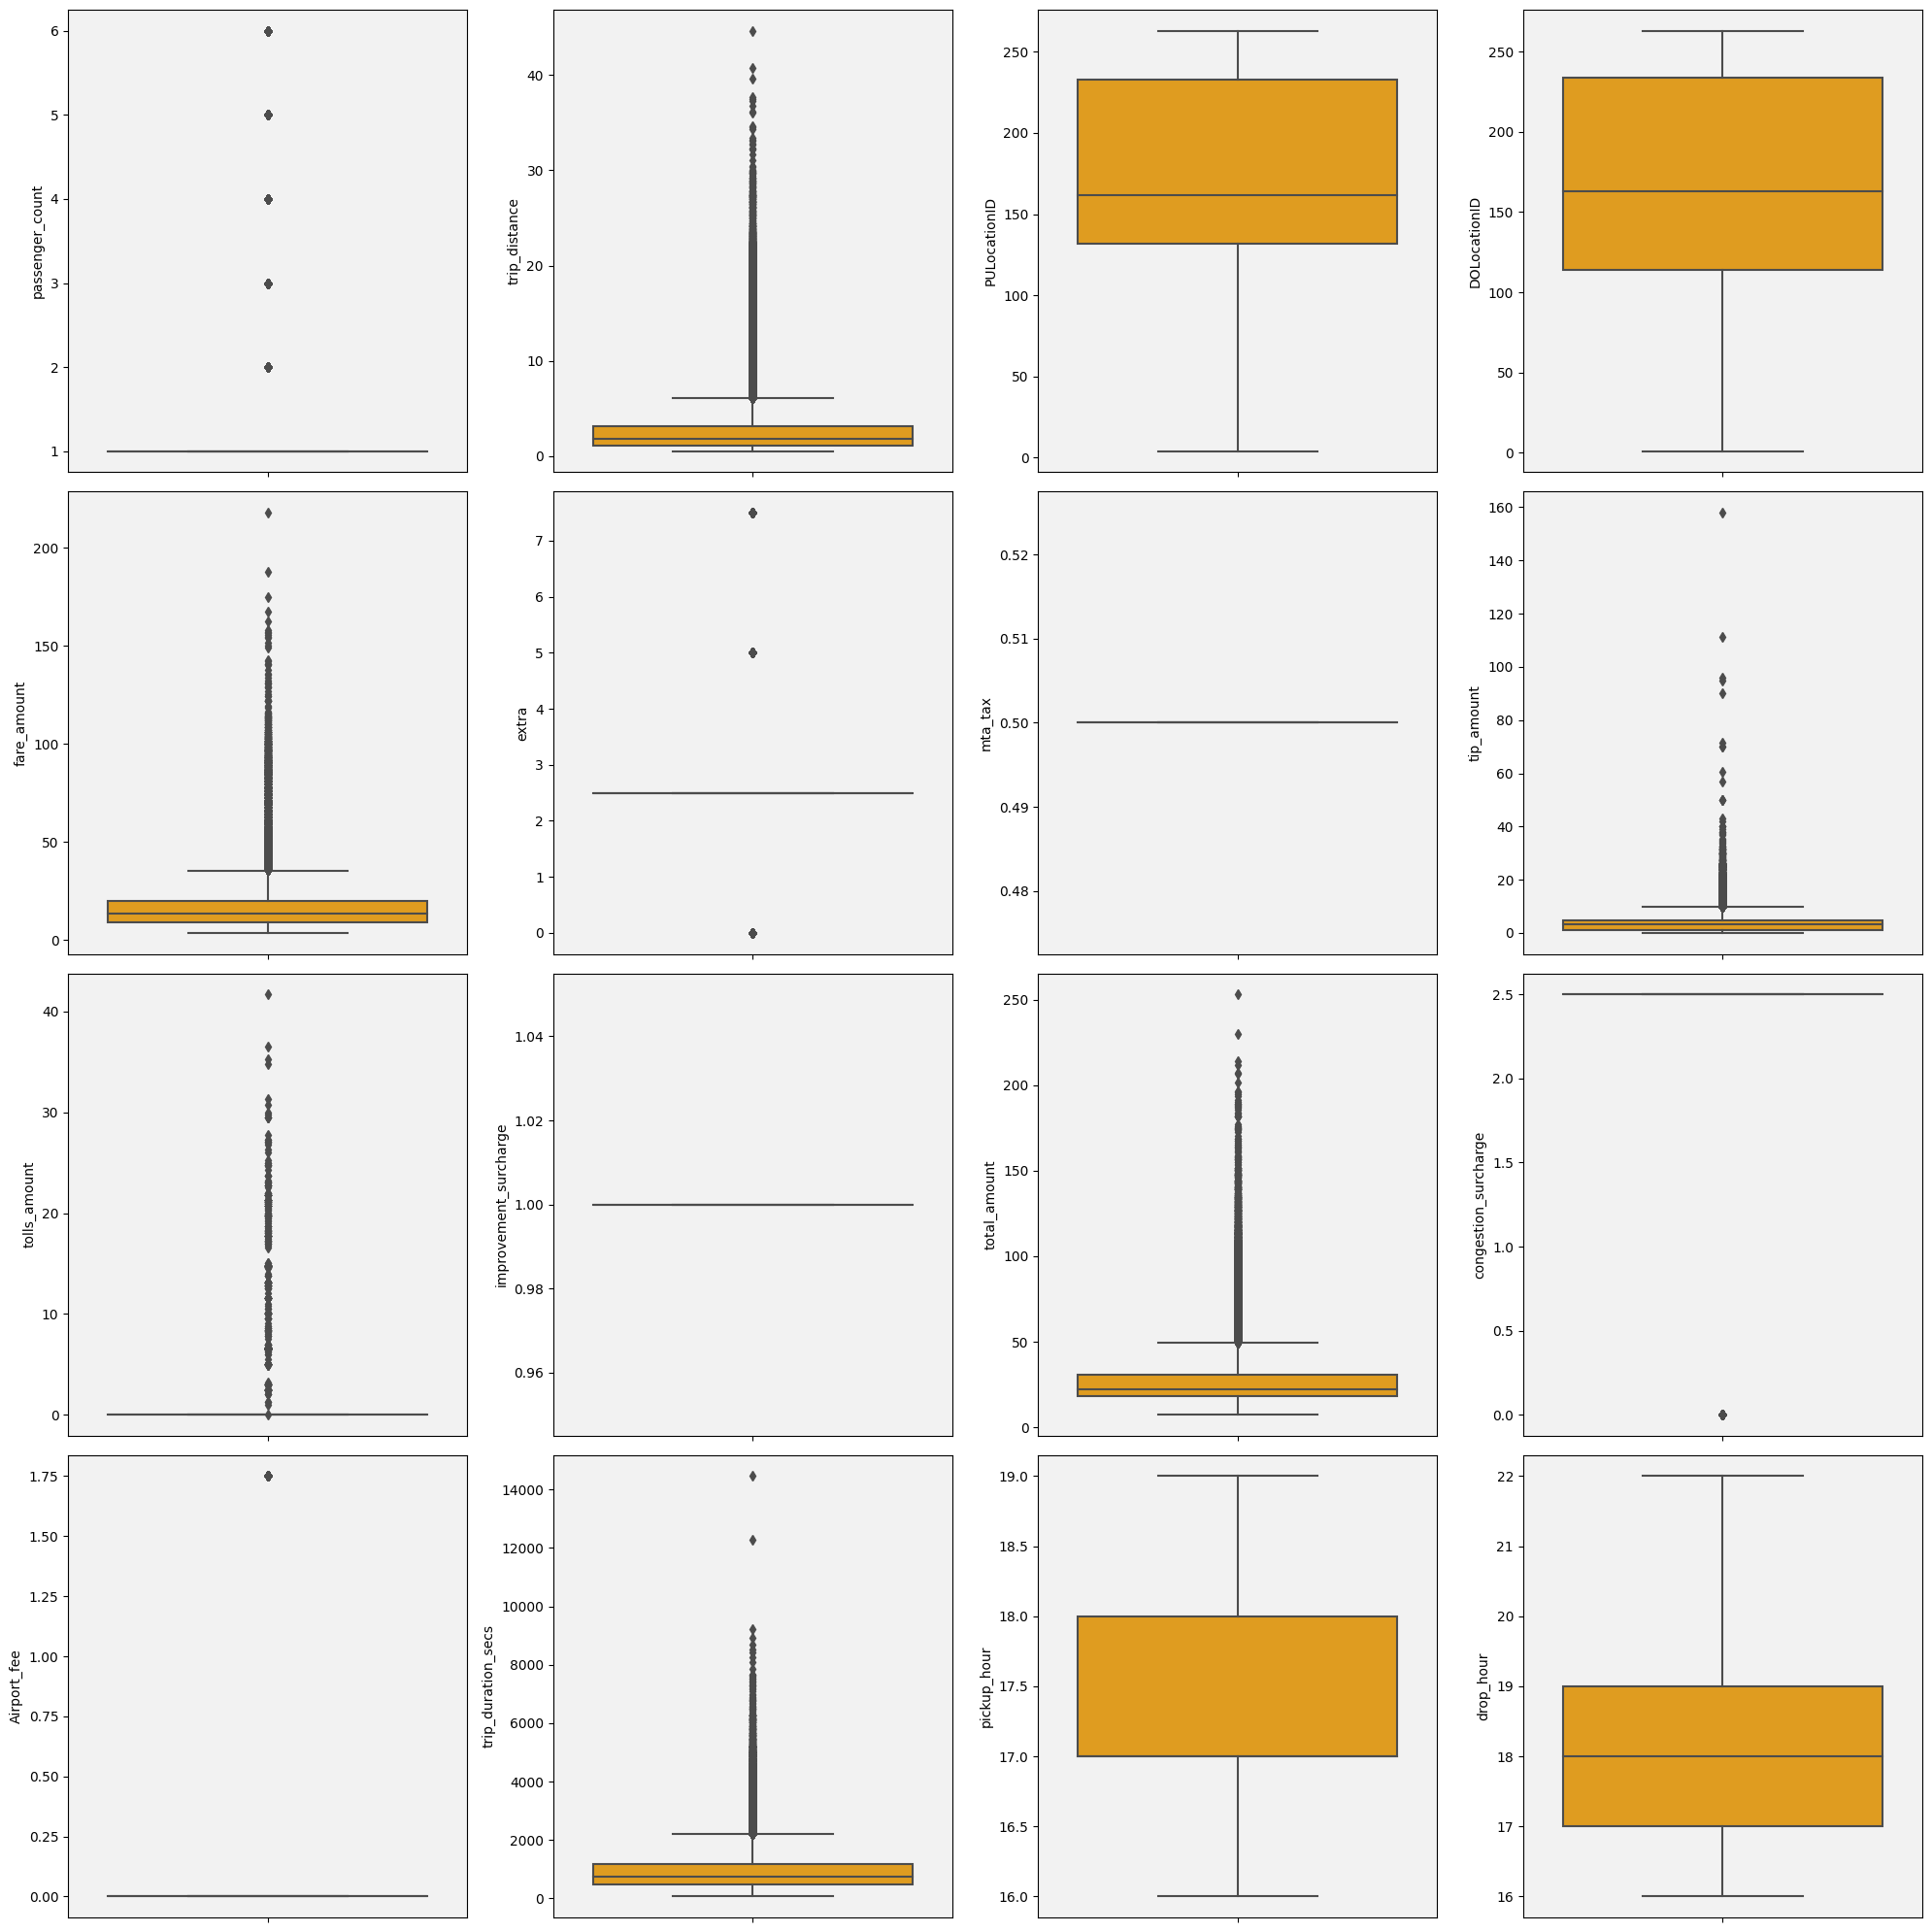

In [74]:
# boxplot for visualising outliers

fig, ax= plt.subplots(4,4, figsize=(20,20))
for i,j in zip(range(len(df.select_dtypes(include='number').columns)), ax.flatten()):
    sns.boxplot(y=df.select_dtypes(include='number').iloc[:,i],ax=j,orient='v', color = 'orange')
    j.set_facecolor("#F2F2F2")
plt.tight_layout()
plt.show()

In [ ]:
# the boxplot confirms the presence of outlier in all columns
# except location ids, mta tax and improvement surcharge
# lets find the most irrelevant outliers and impute/remove those values for further analysis

In [60]:
# dropping insignificant rows 
df = taxidf1.drop(taxidf1[taxidf1["trip_distance"]<=0.5].index, axis=0)
taxidf1.drop(taxidf1[(taxidf1["trip_duration_secs"]>5000) & (taxidf1["trip_distance"]<10)].index,axis=0,inplace=True)

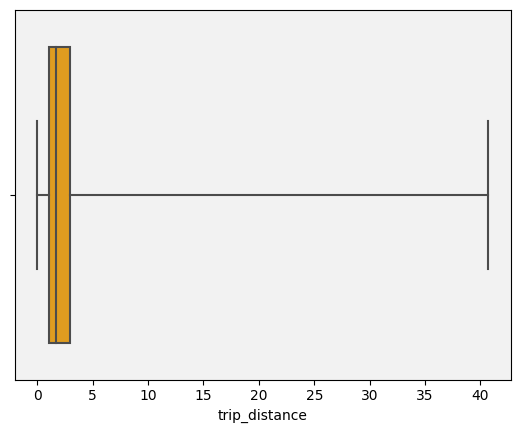

In [80]:
# outlier analysis
# trip_distance
ax = plt.axes()
 
# Setting the background color of the plot
# using set_facecolor() method
ax.set_facecolor("#F2F2F2")
sns.boxplot(x = taxidf1['trip_distance'],whis= 20, color = 'orange')
plt.savefig('my_plot.png', transparent=True)

In [66]:
# dropping extreme outliers

taxidf1 = taxidf1[taxidf1["trip_distance"] <= 43]

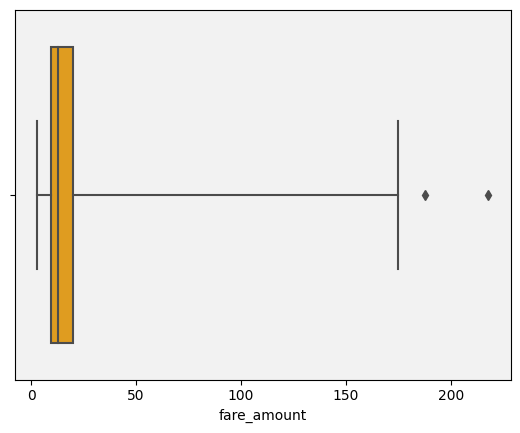

In [78]:
# fare amount
ax = plt.axes()
ax.set_facecolor("#F2F2F2")
sns.boxplot(x = taxidf1['fare_amount'], whis=15, color = 'orange')
plt.show()

In [81]:
Q1 = taxidf1["fare_amount"].quantile(0.25)
Q3 = taxidf1["fare_amount"].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the upper and lower bounds for outlier detection
lower_bound = Q1 - 15 * IQR
upper_bound = Q3 + 15 * IQR

In [82]:
# checking for outliers present above upper bound
taxidf1[taxidf1["fare_amount"] > upper_bound]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
606797        2  2023-04-06 19:10:35   2023-04-06 20:07:30                3   
689134        2  2023-04-07 16:43:55   2023-04-07 17:33:17                1   

        trip_distance RatecodeID store_and_fwd_flag  PULocationID  \
606797          40.71        4.0                  N           132   
689134          36.11        4.0                  N           226   

        DOLocationID payment_type  fare_amount  extra  mta_tax  tip_amount  \
606797             1            1        187.8    2.5      0.5        15.0   
689134             1            1        217.9    2.5      0.5         0.0   

        tolls_amount  improvement_surcharge  total_amount  \
606797          21.3                    1.0        229.85   
689134          31.3                    1.0        253.20   

        congestion_surcharge  Airport_fee PU_Borough      PU_Zone  \
606797                   0.0         1.75     Queens  JFK Airport   
689134                   0.0         0.00     Queens    Sunnyside   

       PU_service_zone DO_Borough         DO_Zone DO_service_zone  \
606797        Airports        EWR  Newark Airport             EWR   
689134       Boro Zone        EWR  Newark Airport             EWR   

        trip_duration_secs pickup_date dropoff_date  pickup_hour  drop_hour  \
606797              3415.0  2023-04-06   2023-04-06           19         20   
689134              2962.0  2023-04-07   2023-04-07           16         17   

       pickup_day dropoff_day  
606797   Thursday    Thursday  
689134     Friday      Friday

In [83]:
# dropping extreme outliers for fare amount
taxidf1 = taxidf1[taxidf1["fare_amount"] < upper_bound]

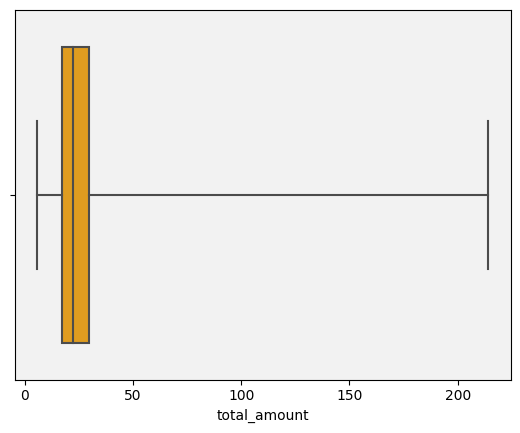

In [85]:
# total_amount
ax = plt.axes()
 
# Setting the background color of the plot
# using set_facecolor() method
ax.set_facecolor("#F2F2F2")
sns.boxplot(x = taxidf1["total_amount"], whis=15, color='orange')
plt.savefig('my_plot.png', transparent=True)

In [86]:
Q1 =taxidf1["total_amount"].quantile(0.25)
Q3 = taxidf1["total_amount"].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the upper and lower bounds for outlier detection
lower_bound = Q1 - 15 * IQR
upper_bound = Q3 + 15 * IQR

In [87]:
# checking for outliers above upper bound
taxidf1[taxidf1["total_amount"] > upper_bound]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee, PU_Borough, PU_Zone, PU_service_zone, DO_Borough, DO_Zone, DO_service_zone, trip_duration_secs, pickup_date, dropoff_date, pickup_hour, drop_hour, pickup_day, dropoff_day]
Index: []

In [88]:
# dropping extreme outliers for total amount
taxidf1 = taxidf1[taxidf1["total_amount"] < upper_bound]

In [89]:
taxidf1.shape

(132013, 32)

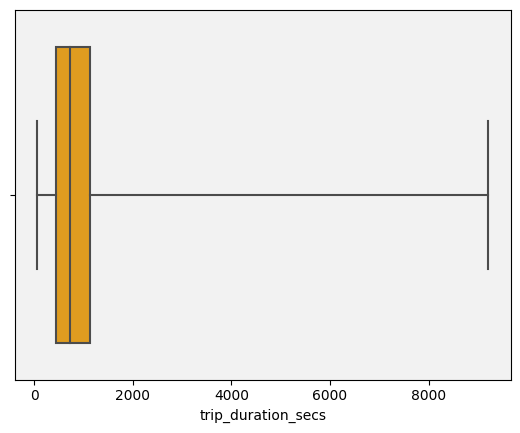

In [91]:
# total_amount
ax = plt.axes()
 
# Setting the background color of the plot
# using set_facecolor() method
ax.set_facecolor("#F2F2F2")
sns.boxplot(x = taxidf1["trip_duration_secs"], whis=15, color = 'orange')
plt.savefig('my_plot.png', transparent=True)

In [92]:
Q1 = taxidf1["trip_duration_secs"].quantile(0.25)
Q3 = taxidf1["trip_duration_secs"].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the upper and lower bounds for outlier detection
lower_bound = Q1 - 15 * IQR
upper_bound = Q3 + 15 * IQR

In [93]:
# checking for outliers above upper bound
taxidf1[taxidf1["trip_duration_secs"] > upper_bound]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee, PU_Borough, PU_Zone, PU_service_zone, DO_Borough, DO_Zone, DO_service_zone, trip_duration_secs, pickup_date, dropoff_date, pickup_hour, drop_hour, pickup_day, dropoff_day]
Index: []

In [94]:
# dropping extreme outliers for trip duration
taxidf1 = taxidf1[taxidf1["trip_duration_secs"] < upper_bound]

In [95]:
# final dataset size
taxidf1.shape

(132013, 32)

The final dataset size after preprocessing stage contains 1,32,013 rows and 32 columns.

<b>Five Number Summary of Variables</b>

In [98]:
# Statistical description for numerical columns
taxidf1.describe().T

count        mean         std    min     25%  \
passenger_count        132013.0    1.419943    0.905025   1.00    1.00   
trip_distance          132013.0    3.178477    4.220052   0.01    1.04   
PULocationID           132013.0  167.159704   61.984597   4.00  132.00   
DOLocationID           132013.0  166.599865   68.819510   1.00  116.00   
fare_amount            132013.0   18.155067   15.984805   3.00    9.30   
extra                  132013.0    2.753877    1.076575   0.00    2.50   
mta_tax                132013.0    0.500000    0.000000   0.50    0.50   
tip_amount             132013.0    3.578966    3.749207   0.00    1.00   
tolls_amount           132013.0    0.498085    1.898453   0.00    0.00   
improvement_surcharge  132013.0    1.000000    0.000000   1.00    1.00   
total_amount           132013.0   28.992484   20.634856   5.90   17.36   
congestion_surcharge   132013.0    2.368877    0.557331   0.00    2.50   
Airport_fee            132013.0    0.137613    0.471049   0.00    0.00   
trip_duration_secs     132013.0  930.973601  751.976508  61.00  447.00   
pickup_hour            132013.0   17.477286    1.084292  16.00   17.00   
drop_hour              132013.0   17.728542    1.133540  16.00   17.00   

                          50%      75%      max  
passenger_count          1.00     1.00     6.00  
trip_distance            1.70     2.98    39.63  
PULocationID           162.00   234.00   263.00  
DOLocationID           163.00   234.00   263.00  
fare_amount             12.80    19.80   175.00  
extra                    2.50     2.50     7.50  
mta_tax                  0.50     0.50     0.50  
tip_amount               3.02     4.55   158.00  
tolls_amount             0.00     0.00    41.71  
improvement_surcharge    1.00     1.00     1.00  
total_amount            22.20    29.88   214.17  
congestion_surcharge     2.50     2.50     2.50  
Airport_fee              0.00     0.00     1.75  
trip_duration_secs     718.00  1138.00  9213.00  
pickup_hour             17.00    18.00    19.00  
drop_hour               18.00    19.00    21.00

In [ ]:
# from the summary, we can infer that the mta_tax, improvement_surcharge columns has 0 variance. 
# Hence, it will provide no value to the model. 
# those can be removed before model building.

In [99]:
# Statistical description for categorical columns
taxidf1.describe(include=object).T

count unique                    top      freq
VendorID              132013      2                      2     97903
RatecodeID          132013.0    5.0                    1.0  126029.0
store_and_fwd_flag    132013      2                      N    131381
payment_type          132013      4                      1    107711
PU_Borough            132013      4              Manhattan    120246
PU_Zone               132013    144         Midtown Center      8625
PU_service_zone       132013      3            Yellow Zone    117984
DO_Borough            132013      6              Manhattan    122721
DO_Zone               132013    246  Upper East Side North      6812
DO_service_zone       132013      4            Yellow Zone    117388
pickup_date           132013      5             2023-04-05     28843
dropoff_date          132013      5             2023-04-05     28843
pickup_day            132013      5              Wednesday     28843
dropoff_day           132013      5              Wednesday     28843

In [100]:
taxidf1.shape

(132013, 32)

In [ ]:
# the final dataset contains 1,32,013 rows and 32 columns.

<b>Exploratory Data Analysis</b>

In [105]:
taxidf1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132013 entries, 256283 to 710537
Data columns (total 32 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               132013 non-null  object        
 1   tpep_pickup_datetime   132013 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  132013 non-null  datetime64[ns]
 3   passenger_count        132013 non-null  int32         
 4   trip_distance          132013 non-null  float64       
 5   RatecodeID             132013 non-null  object        
 6   store_and_fwd_flag     132013 non-null  object        
 7   PULocationID           132013 non-null  int64         
 8   DOLocationID           132013 non-null  int64         
 9   payment_type           132013 non-null  object        
 10  fare_amount            132013 non-null  float64       
 11  extra                  132013 non-null  float64       
 12  mta_tax                132013 non-null 

In [106]:
# dropping the redundant columns before analysis
taxidf1.drop(columns = ['tpep_pickup_datetime', 'tpep_dropoff_datetime' , 'PU_Zone', 'DO_Zone', 'PU_service_zone', 'DO_service_zone', 'pickup_date', 'dropoff_date'], inplace = True)

In [272]:
# Dtype conversion for analysis
taxidf1['passenger_count'] = taxidf1['passenger_count'].astype(object)
taxidf1['PULocationID'] = taxidf1['PULocationID'].astype(object)
taxidf1['DOLocationID'] = taxidf1['DOLocationID'].astype(object)
taxidf1['pickup_hour'] = taxidf1['pickup_hour'].astype(object)
taxidf1['drop_hour'] = taxidf1['drop_hour'].astype(object)

In [273]:
taxidf1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132013 entries, 256283 to 710537
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   VendorID              132013 non-null  object 
 1   passenger_count       132013 non-null  object 
 2   trip_distance         132013 non-null  float64
 3   RatecodeID            132013 non-null  object 
 4   store_and_fwd_flag    132013 non-null  object 
 5   PULocationID          132013 non-null  object 
 6   DOLocationID          132013 non-null  object 
 7   payment_type          132013 non-null  object 
 8   fare_amount           132013 non-null  float64
 9   extra                 132013 non-null  float64
 10  tip_amount            132013 non-null  float64
 11  tolls_amount          132013 non-null  float64
 12  total_amount          132013 non-null  float64
 13  congestion_surcharge  132013 non-null  float64
 14  Airport_fee           132013 non-null  float64


<b>Univariate Analysis - Numeric Variables</b>

In [294]:
taxidf1.select_dtypes('number').columns

Index(['trip_distance', 'fare_amount', 'extra', 'tip_amount', 'tolls_amount',
       'total_amount', 'congestion_surcharge', 'Airport_fee',
       'trip_duration_secs'],
      dtype='object')

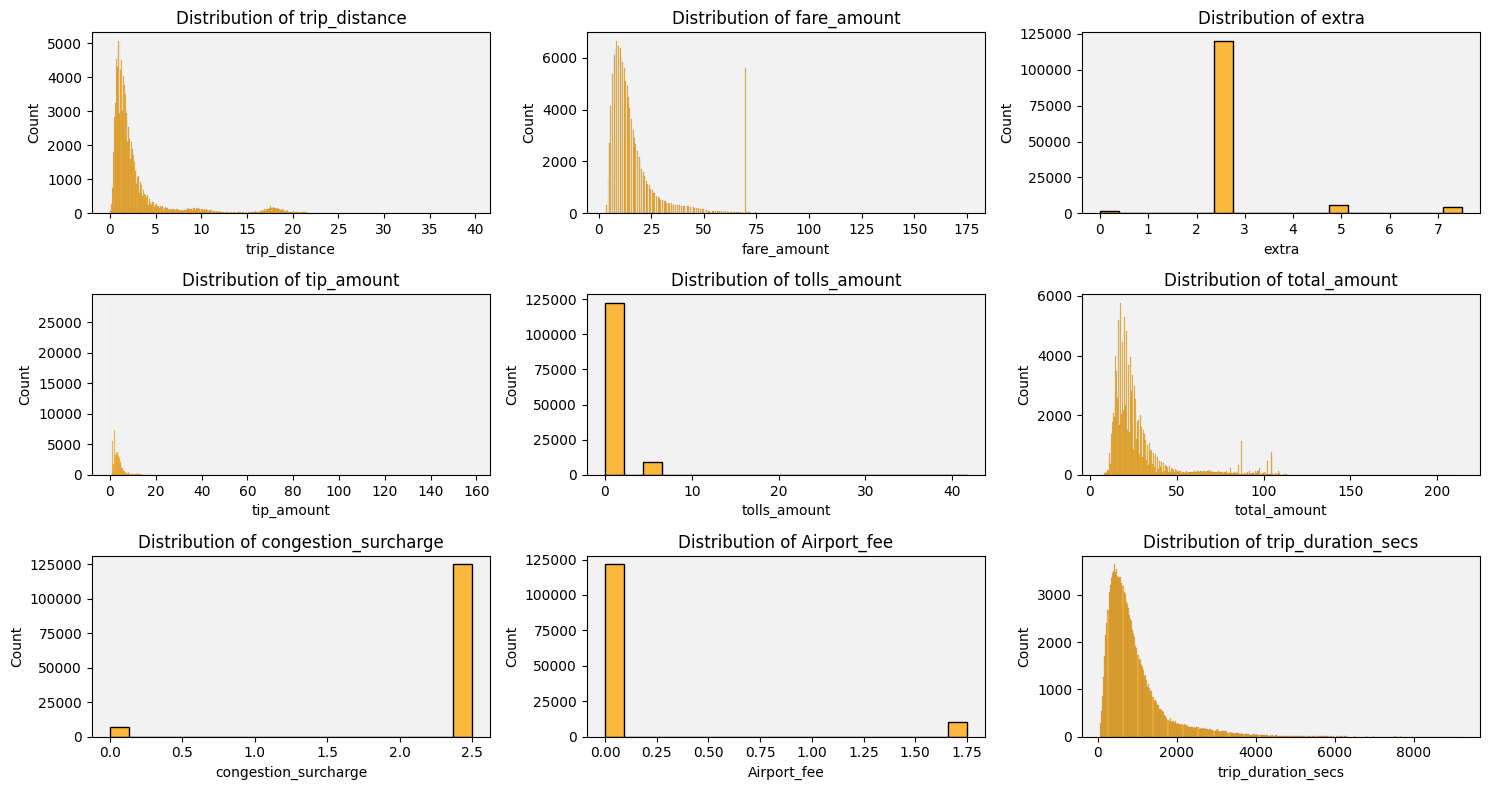

In [295]:
# Create a figure with 1 row and 2 columns
plt.figure(figsize=(15, 8))

# trip distance
plt.subplot(3, 3, 1)
sns.histplot(x = taxidf1['trip_distance'], color ='orange')
plt.title('Distribution of trip_distance')
plt.gca().set_facecolor("#F2F2F2")

# fare_amount
plt.subplot(3, 3, 2)
sns.histplot(x = taxidf1['fare_amount'], color ='orange')
plt.title('Distribution of fare_amount')
plt.gca().set_facecolor("#F2F2F2")

# extra
plt.subplot(3, 3, 3)
sns.histplot(x = taxidf1['extra'], color ='orange')
plt.title('Distribution of extra')
plt.gca().set_facecolor("#F2F2F2")

# tip_amount
plt.subplot(3, 3, 4)
sns.histplot(x = taxidf1['tip_amount'], color ='orange')
plt.title('Distribution of tip_amount')
plt.gca().set_facecolor("#F2F2F2")

# tolls_amount
plt.subplot(3, 3, 5)
sns.histplot(x = taxidf1['tolls_amount'], color ='orange')
plt.title('Distribution of tolls_amount')
plt.gca().set_facecolor("#F2F2F2")

# total_amount
plt.subplot(3, 3, 6)
sns.histplot(x = taxidf1['total_amount'], color ='orange')
plt.title('Distribution of total_amount')
plt.gca().set_facecolor("#F2F2F2")

# congestion_surcharge
plt.subplot(3, 3, 7)
sns.histplot(x = taxidf1['congestion_surcharge'], color ='orange')
plt.title('Distribution of congestion_surcharge')
plt.gca().set_facecolor("#F2F2F2")

# Airport_fee
plt.subplot(3, 3, 8)
sns.histplot(x = taxidf1['Airport_fee'], color ='orange')
plt.title('Distribution of Airport_fee')
plt.gca().set_facecolor("#F2F2F2")

# trip_duration_secs
plt.subplot(3, 3, 9)
sns.histplot(x = taxidf1['trip_duration_secs'], color ='orange')
plt.title('Distribution of trip_duration_secs')
plt.gca().set_facecolor("#F2F2F2")

# Adjust subplot layout
plt.tight_layout()

# Show the plot
plt.show()

<b>Univariate Analysis - Categorical Variables</b>

In [290]:
taxidf1.select_dtypes(object).columns

Index(['VendorID', 'passenger_count', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'PU_Borough',
       'DO_Borough', 'pickup_hour', 'drop_hour', 'pickup_day', 'dropoff_day'],
      dtype='object')

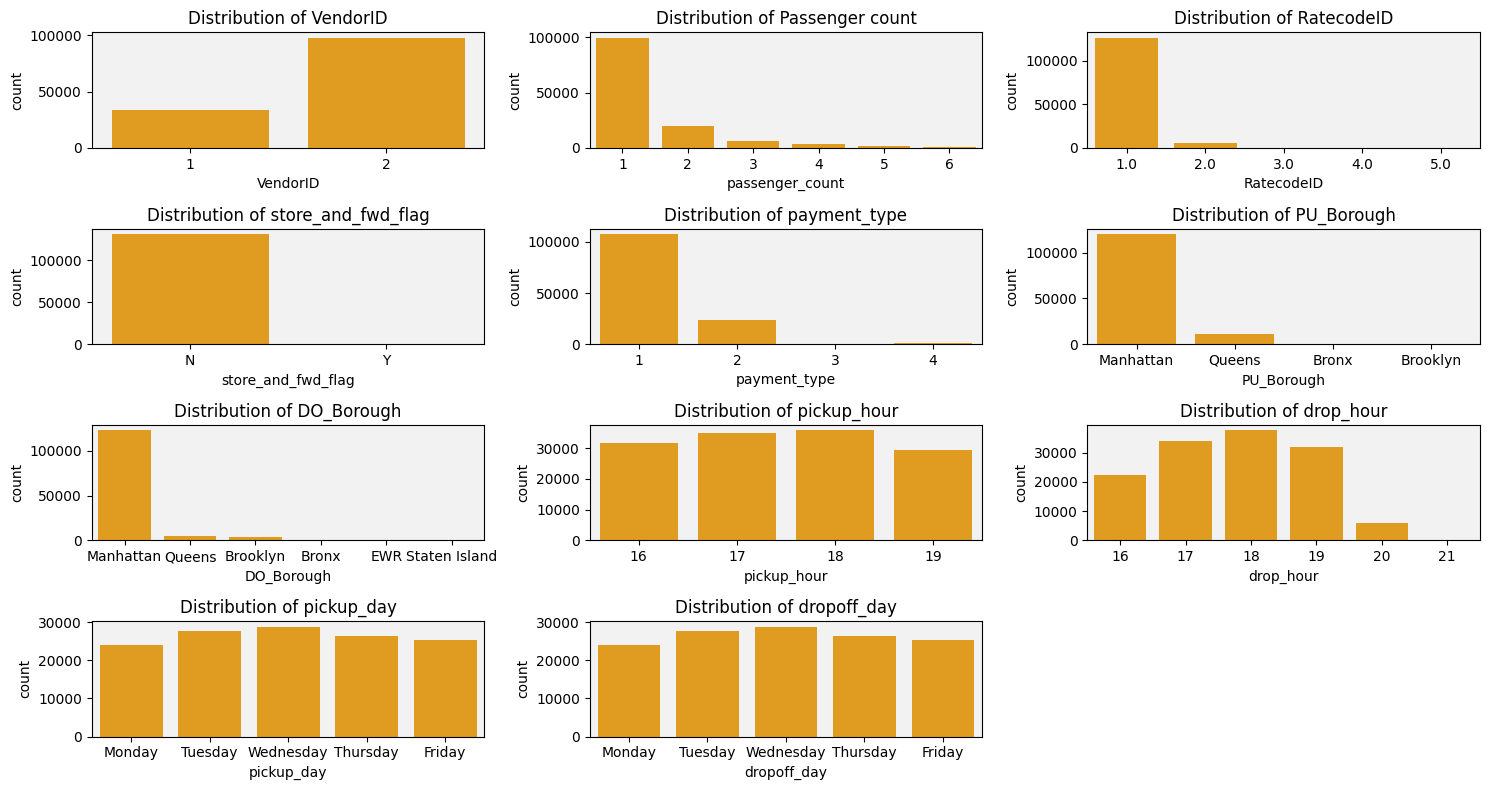

In [293]:
# Create a figure with 1 row and 2 columns
plt.figure(figsize=(15, 8))

# Vendor ID
plt.subplot(4, 3, 1)
sns.countplot(x = taxidf1['VendorID'], color ='orange')
plt.title('Distribution of VendorID')
plt.gca().set_facecolor("#F2F2F2")

# passenger count
plt.subplot(4,3,2)
sns.countplot(x= taxidf1['passenger_count'], color='orange')
plt.title('Distribution of Passenger count')
plt.gca().set_facecolor("#F2F2F2")

# Ratecodeid
plt.subplot(4,3,3)
sns.countplot(x=taxidf1['RatecodeID'], color='orange')
plt.title('Distribution of RatecodeID')
plt.gca().set_facecolor("#F2F2F2")

# store and fwd flag
plt.subplot(4,3,4)
sns.countplot(x=taxidf1['store_and_fwd_flag'], color='orange')
plt.title('Distribution of store_and_fwd_flag')
plt.gca().set_facecolor("#F2F2F2")


# payment_type
plt.subplot(4,3,5)
sns.countplot(x=taxidf1['payment_type'], color='orange')
plt.title('Distribution of payment_type')
plt.gca().set_facecolor("#F2F2F2")

# PU_Borough
plt.subplot(4,3,6)
sns.countplot(x=taxidf1['PU_Borough'], color='orange')
plt.title('Distribution of PU_Borough')
plt.gca().set_facecolor("#F2F2F2")

# DO_Borough
plt.subplot(4,3,7)
sns.countplot(x=taxidf1['DO_Borough'], color='orange')
plt.title('Distribution of DO_Borough')
plt.gca().set_facecolor("#F2F2F2")

# pickup_hour
plt.subplot(4,3,8)
sns.countplot(x=taxidf1['pickup_hour'], color='orange')
plt.title('Distribution of pickup_hour')
plt.gca().set_facecolor("#F2F2F2")

# drop_hour
plt.subplot(4,3,9)
sns.countplot(x=taxidf1['drop_hour'], color='orange')
plt.title('Distribution of drop_hour')
plt.gca().set_facecolor("#F2F2F2")

# pickup_day
plt.subplot(4,3,10)
sns.countplot(x=taxidf1['pickup_day'], color='orange')
plt.title('Distribution of pickup_day')
plt.gca().set_facecolor("#F2F2F2")

# dropoff_day
plt.subplot(4,3,11)
sns.countplot(x=taxidf1['dropoff_day'], color='orange')
plt.title('Distribution of dropoff_day')
plt.gca().set_facecolor("#F2F2F2")


# Adjust subplot layout
plt.tight_layout()

# Show the plot
plt.show()


**Inference**

From the above visualization we can observe that,

1) 74.16% of the trips fall under vendorID 2 and 25.84% trips fall under vendor Id 1.</br> 
2) 75.41% ,14.98%, 4.64%,2.95%,1.25%,0.78% of the trips there were single,two,three,four,five,six passenger respectively.</br>
3) In 95.47%,4.25% ,0.21%,0.01%,0.06% of the trips fall under RatecodeID-1,2,3,4,5 respectively.</br>
4) Congestion charge has been collected for 94.76% of the trips.</br>
5) 7.86% of the trips were started from Laguardia and JFK airports whereas 92.14% from other locations.</br>
6) 91% of the trips have been charged an extra fee of 2.5 and have been not been charged for 1.19% of the trips.</br>
7) An extra fee of 5 dollars has been charged for 4.29% and 7.5 dollars charged for 3.52% of trips.</br>
8) Wednesdays has the highest percent of pickups with 21.85% and Mondays has the least percent pickups with 18.17% and dropoff same since occuring on the same day.</br>
9) The highest frequency of pickups is at 6 PM with 27.16% and the lowest is at 7 PM with 22.29%
10) 6pm in the evenings has highest percentage of dropoffs with 28.54% and 8pm having least percentage of dropoffs with 4.39%.</br>
11) LocationId with 161 is the top most common pickup with 15.2% Pickups whereas LocationId with 236 is the most common Dropoff with 14.5% Dropoff trips.</br>
12) In 99.52% of the trips, the vehicle had connection with the server whereas 0.48% did not have connection.</br>
13) In 81.59%,17.56%,0.29%,0.56% trips the payments were made through Credit Card,cash,No charge and disputed respectively.</br>

<b>Bivariate Analysis</b>

In [119]:
# correlation matrix of all the numeric columns
taxidf1.corr()

trip_distance  fare_amount     extra  mta_tax  \
trip_distance               1.000000     0.965998  0.598087      NaN   
fare_amount                 0.965998     1.000000  0.562002      NaN   
extra                       0.598087     0.562002  1.000000      NaN   
mta_tax                          NaN          NaN       NaN      NaN   
tip_amount                  0.566148     0.584184  0.415577      NaN   
tolls_amount                0.707534     0.695211  0.601422      NaN   
improvement_surcharge            NaN          NaN       NaN      NaN   
total_amount                0.956565     0.981748  0.628758      NaN   
congestion_surcharge       -0.289209    -0.293678 -0.214850      NaN   
Airport_fee                 0.740405     0.683594  0.709375      NaN   
trip_duration_secs          0.843813     0.909371  0.460536      NaN   

                       tip_amount  tolls_amount  improvement_surcharge  \
trip_distance            0.566148      0.707534                    NaN   
fare_amount              0.584184      0.695211                    NaN   
extra                    0.415577      0.601422                    NaN   
mta_tax                       NaN           NaN                    NaN   
tip_amount               1.000000      0.464233                    NaN   
tolls_amount             0.464233      1.000000                    NaN   
improvement_surcharge         NaN           NaN                    NaN   
total_amount             0.704890      0.755026                    NaN   
congestion_surcharge    -0.104998     -0.140855                    NaN   
Airport_fee              0.398755      0.550064                    NaN   
trip_duration_secs       0.528469      0.545918                    NaN   

                       total_amount  congestion_surcharge  Airport_fee  \
trip_distance              0.956565             -0.289209     0.740405   
fare_amount                0.981748             -0.293678     0.683594   
extra                      0.628758             -0.214850     0.709375   
mta_tax                         NaN                   NaN          NaN   
tip_amount                 0.704890             -0.104998     0.398755   
tolls_amount               0.755026             -0.140855     0.550064   
improvement_surcharge           NaN                   NaN          NaN   
total_amount               1.000000             -0.253611     0.700756   
congestion_surcharge      -0.253611              1.000000    -0.432679   
Airport_fee                0.700756             -0.432679     1.000000   
trip_duration_secs         0.881671             -0.193448     0.533509   

                       trip_duration_secs  
trip_distance                    0.843813  
fare_amount                      0.909371  
extra                            0.460536  
mta_tax                               NaN  
tip_amount                       0.528469  
tolls_amount                     0.545918  
improvement_surcharge                 NaN  
total_amount                     0.881671  
congestion_surcharge            -0.193448  
Airport_fee                      0.533509  
trip_duration_secs               1.000000

In [121]:
# since mta_tax and improvement surcharge has no correlation. 
# Removing it from the correlation analysis
taxidf1.drop(columns = ['mta_tax', 'improvement_surcharge'], inplace = True)

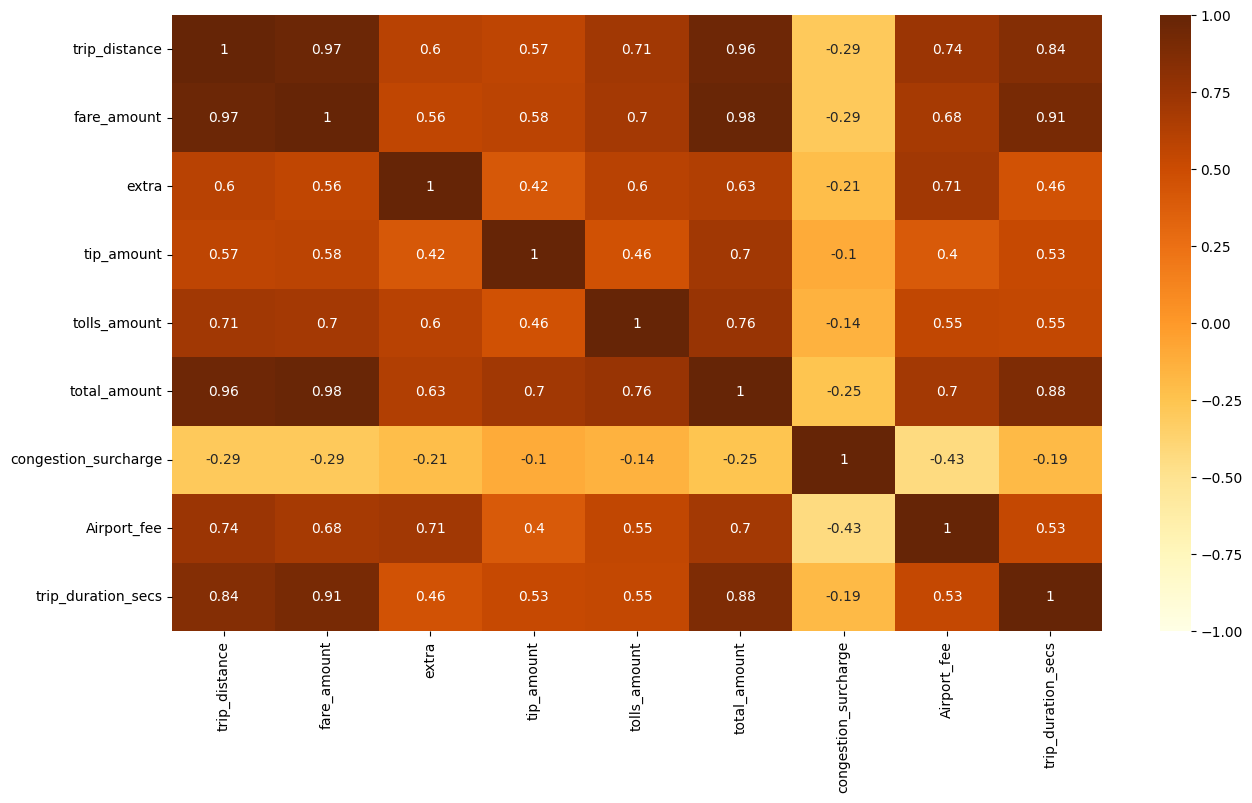

In [122]:
# Heatmap for correlation analysis
plt.figure(figsize=(15,8))
ax = plt.axes()
ax.set_facecolor('#F2F2F2')
sns.heatmap(taxidf1.corr(), annot=True, vmin=-1, vmax=1, cmap="YlOrBr")
plt.show()

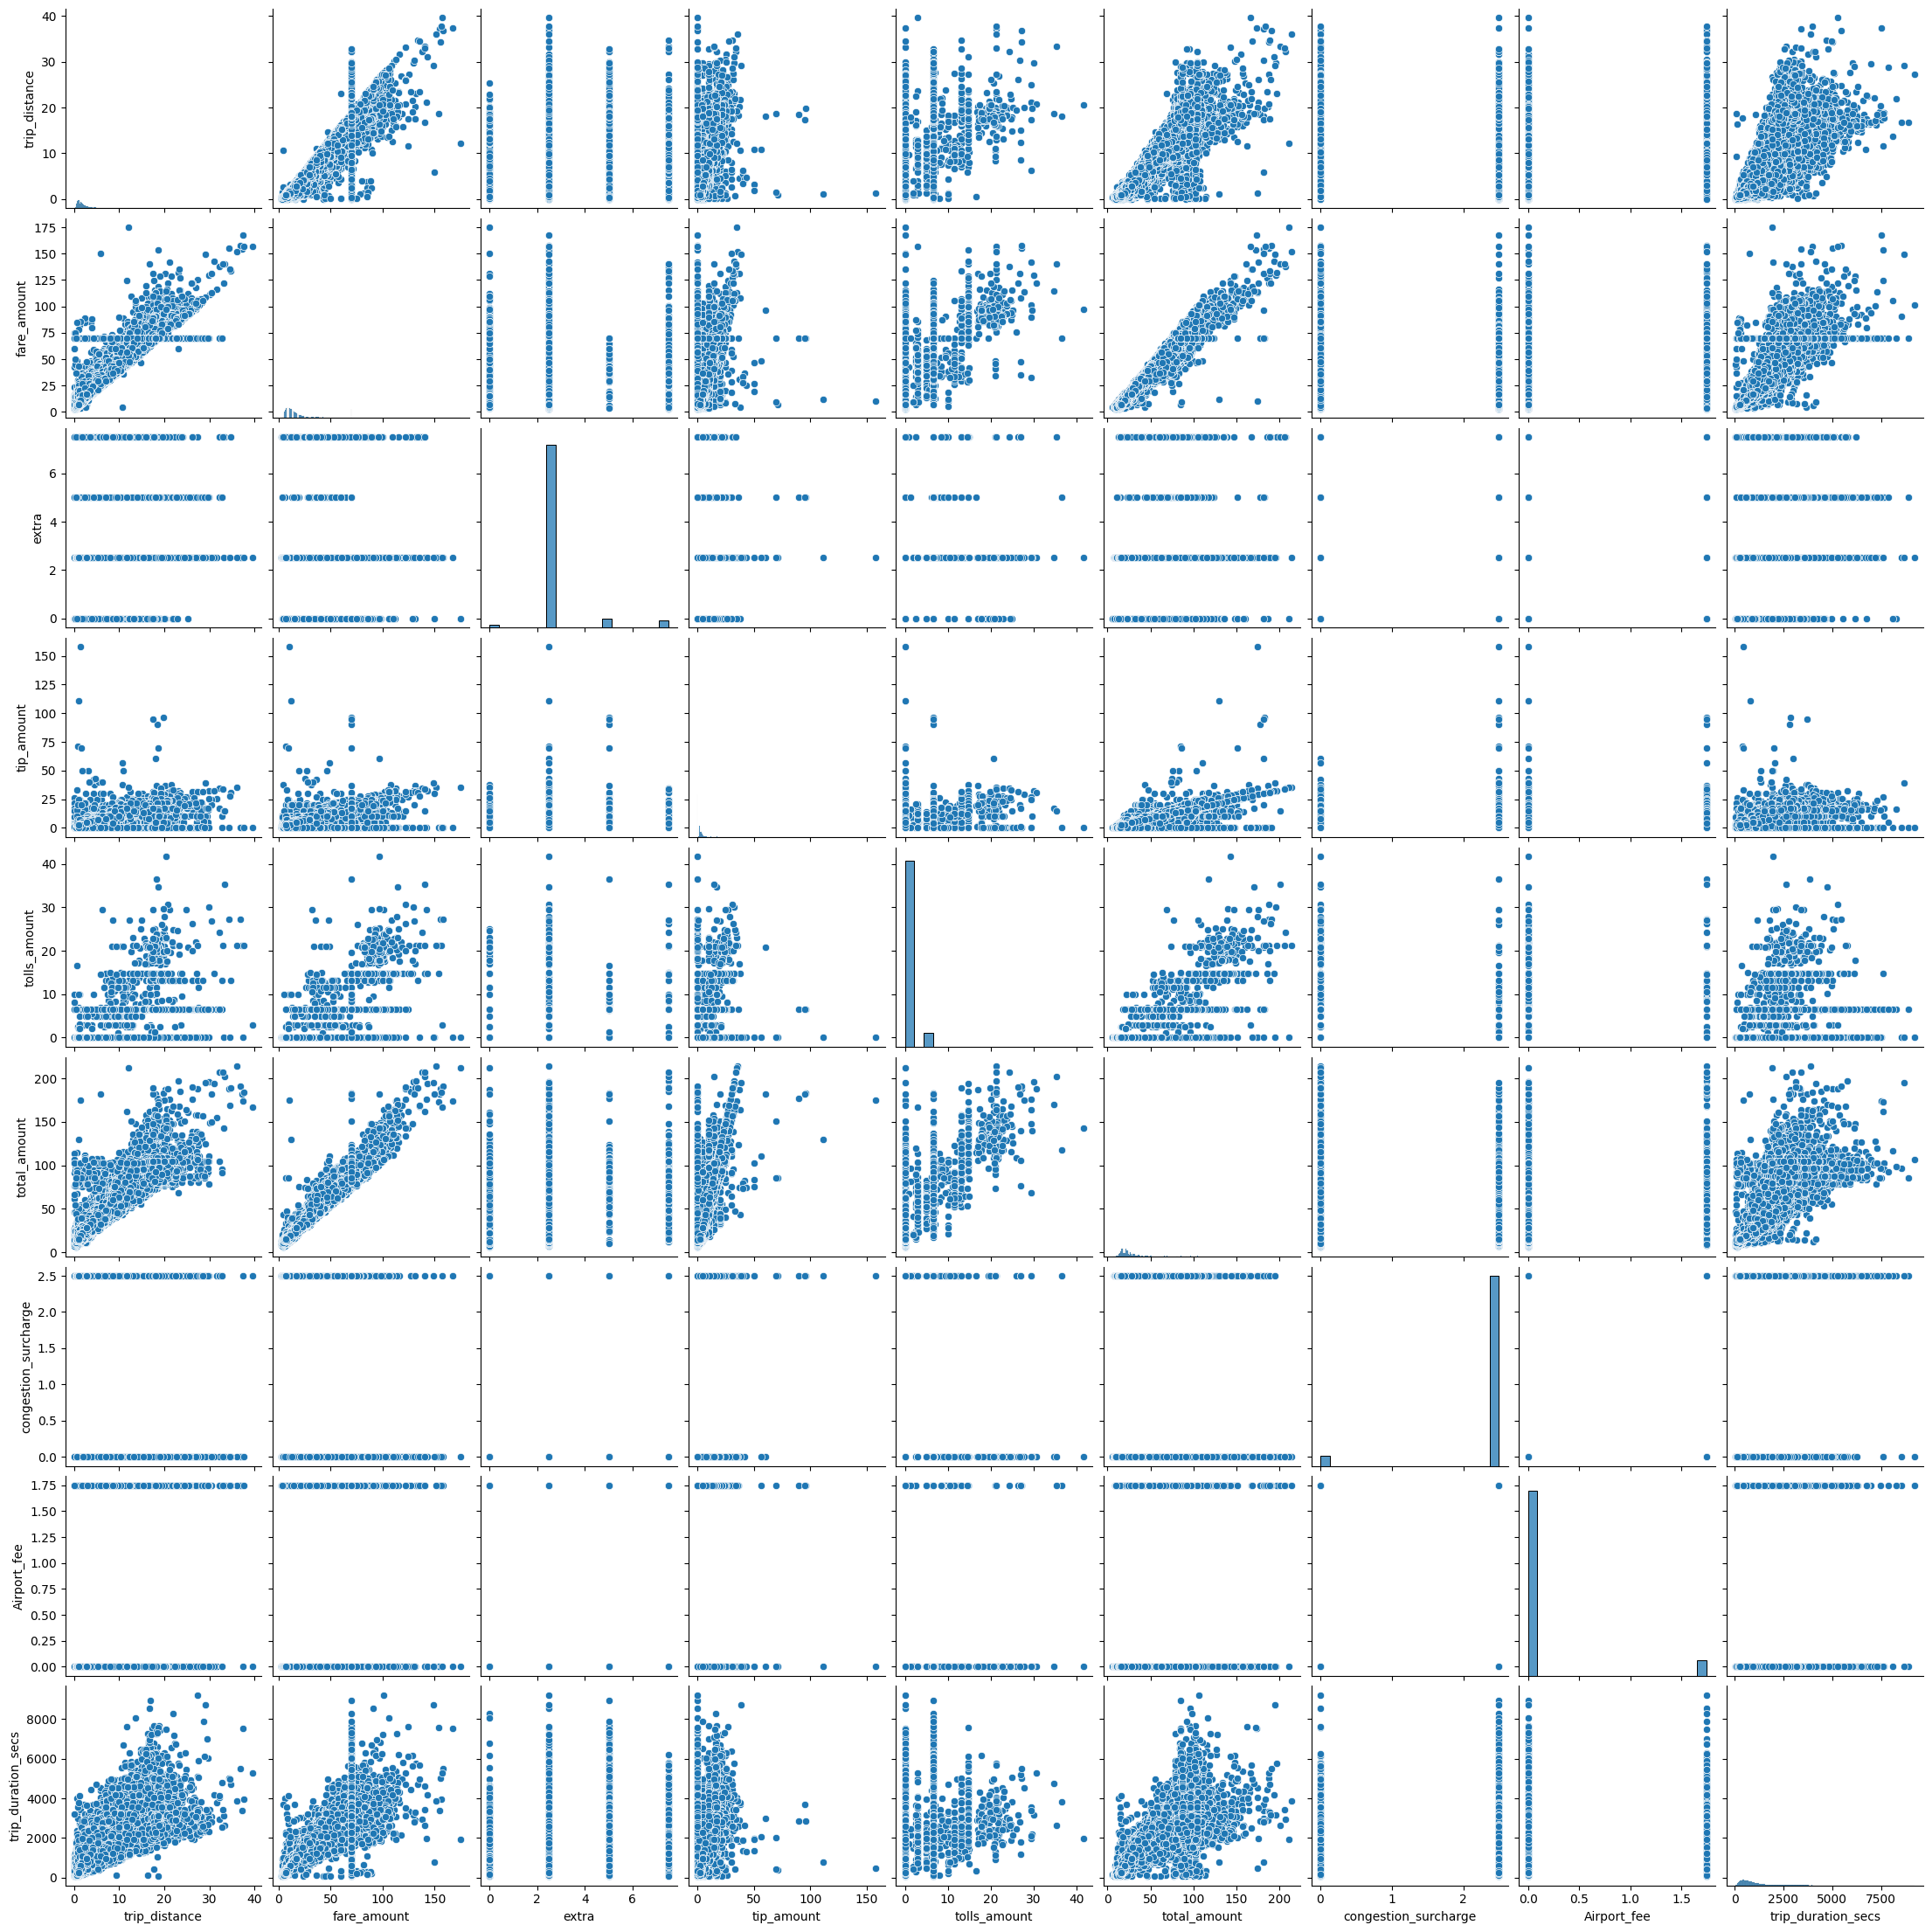

In [128]:
# create a dataframe for numeric variables
df_numeric = taxidf1.select_dtypes(np.number)
# pairplot for checking the scatterplot 
sns.pairplot(df_numeric, palette='YlOrBr')
plt.show()

**Inference**

From the heat map of correlation matrix and the pairplot, the points that can be concluded are:

1) Fare amount and total amount has the strongest correlation with a value of 0.98</br>
2) Also, trip duration has very high correlations with both trip_distance, total amount and fare amount having correlations of 0.84,0.88 and 0.91 respectively</br>
3) mta_tax and improvement surcharge features are all constants.</br>

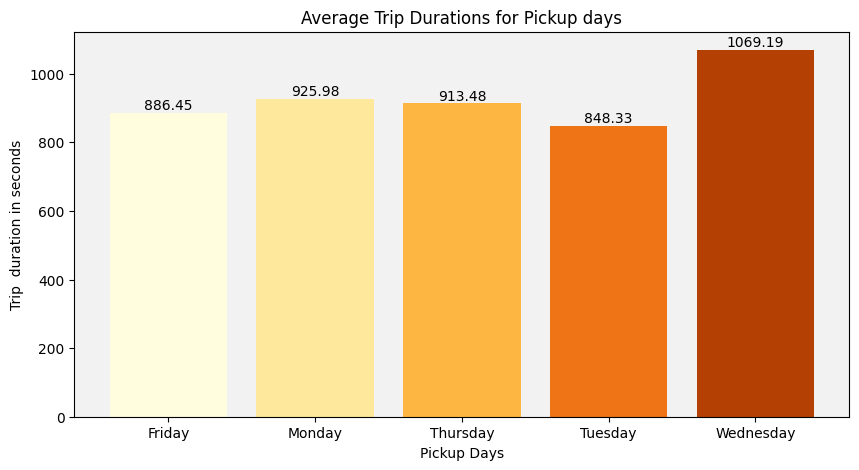

In [157]:
# Average trip duration for the pickup days
plt.figure(figsize=(10,5))
ax = plt.axes()
a = taxidf1.groupby(['pickup_day'])['trip_duration_secs'].mean()
a=round(a,2)
plt.bar(x=range(0,5),height=a.values, color=plt.cm.YlOrBr(range(6,256,50)))

for i in range(len(a)):
    plt.text(s=str(a[i]), x=i, y=a.values[i]+10,ha='center')
plt.xticks(labels=a.index,ticks=range(0,5))
ax.set_facecolor('#F2F2F2')
plt.xlabel('Pickup Days')
plt.ylabel('Trip  duration in seconds')
plt.title('Average Trip Durations for Pickup days')
plt.show()

**Inference**

The average trip duration of Wednesdays is the highest with 1069.19 seconds and the least is on Tuesday with 848.33 seconds.


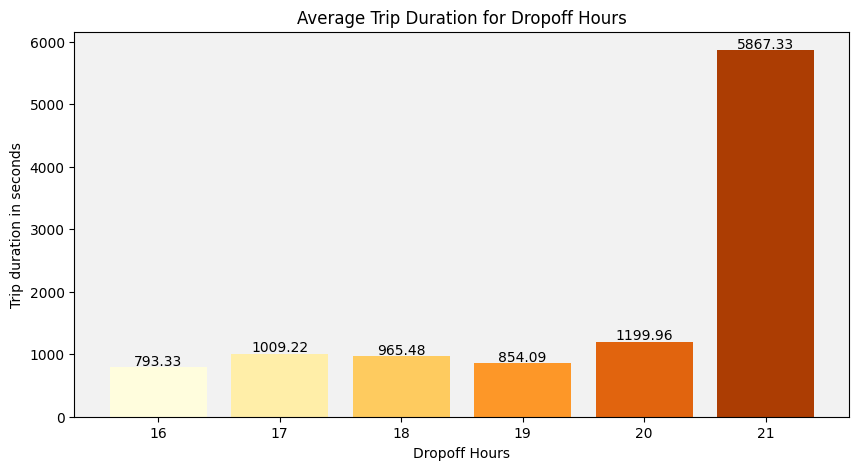

In [158]:
# Average trip duration for the dropoff hours
plt.figure(figsize=(10,5))
ax = plt.axes()
a2 = taxidf1.groupby(['drop_hour'])['trip_duration_secs'].mean()
a2=round(a2,2)
plt.bar(x=range(len(a2)),height=a2.values, color=plt.cm.YlOrBr(range(6,256,250//len(a2))))

for i, value in enumerate(a2.values):
    plt.text(i, value + 30, str(value), ha='center')
ax.set_facecolor('#F2F2F2')
plt.xticks(labels=a2.index,ticks=range(len(a2)))
plt.xlabel('Dropoff Hours')
plt.ylabel('Trip duration in seconds')
plt.title('Average Trip Duration for Dropoff Hours')
plt.show()

**Inference**

For the dropoffs at 9 PM the average trip duration is the highest with the value of 5867.33 seconds and the least is at 4PM with value of 793.3 seconds.

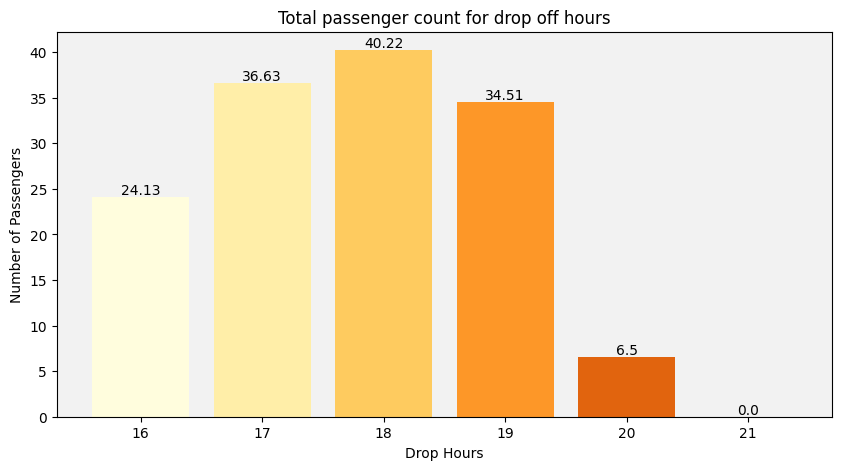

In [160]:
# passenger count for drop off hours
plt.figure(figsize=(10,5))
ax = plt.axes()
a5 = taxidf1.groupby(['drop_hour'])['passenger_count'].sum()/len(taxidf1)*100
a5=round(a5,2)
plt.bar(x=range(len(a5)),height=a5.values, color=plt.cm.YlOrBr(range(6,256,250//len(a5))))

for i, value in enumerate(a5.values):
    plt.text(i, value + 0.3, str(value), ha='center')
ax.set_facecolor('#F2F2F2')
plt.xticks(labels=a5.index,ticks=range(len(a5)))
plt.ylabel('Number of Passengers')
plt.xlabel('Drop Hours')
plt.title('Total passenger count for drop off hours')
plt.show()

**Inference**

The passenger count is highest at 6PM with 40.22 % passengers during the drop hours.

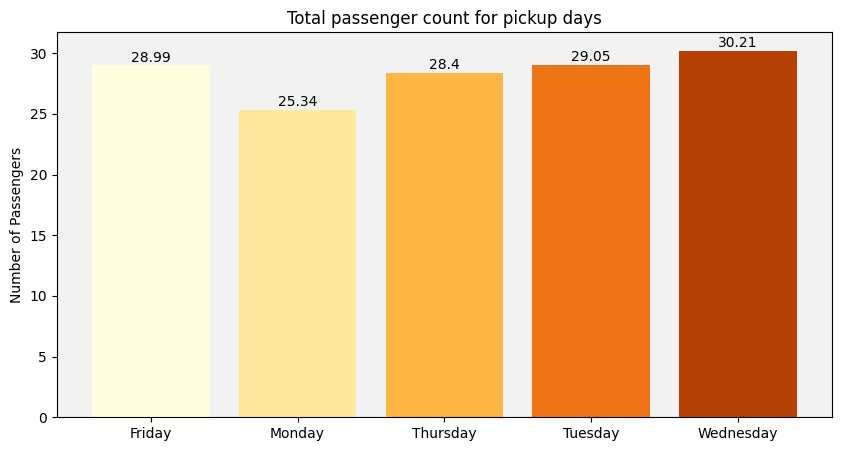

In [161]:
# Total passenger count for pickup days
plt.figure(figsize=(10,5))
ax = plt.axes()
a18 = taxidf1.groupby(['pickup_day'])['passenger_count'].sum()/len(taxidf1)*100
a18=round(a18,2)
plt.bar(x=range(len(a18)),height=a18.values, color=plt.cm.YlOrBr(range(6,256,250//len(a18))))

for i, value in enumerate(a18.values):
    plt.text(i, value + 0.3, str(value), ha='center')
ax.set_facecolor('#F2F2F2')
plt.xticks(labels=a18.index,ticks=range(len(a18)))
plt.ylabel('Number of Passengers')
plt.title('Total passenger count for pickup days')
plt.show()

**Inference**

The passenger count is highest on Wednesdays with 30.21% passengers and least on Mondays with 25.34% passengers during the pickup days

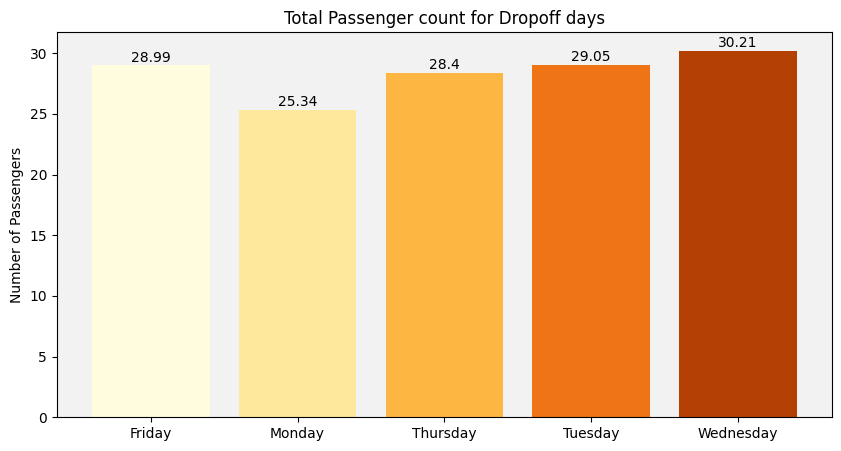

In [162]:
# Total Passenger count for Drop off days
plt.figure(figsize=(10,5))
ax = plt.axes()
a18 = taxidf1.groupby(['dropoff_day'])['passenger_count'].sum()/len(taxidf1)*100
a18=round(a18,2)
plt.bar(x=range(len(a18)),height=a18.values, color=plt.cm.YlOrBr(range(6,256,250//len(a18))))

for i, value in enumerate(a18.values):
    plt.text(i, value + 0.3, str(value), ha='center')
ax.set_facecolor('#F2F2F2')
plt.xticks(labels=a18.index,ticks=range(len(a18)))
plt.ylabel('Number of Passengers')
plt.title('Total Passenger count for Dropoff days')
plt.show()

**Inference**

By infering previous observation it can be concluded that the anlysis on the total passengers on the pickup days is the same as the total passengers on the drop days.

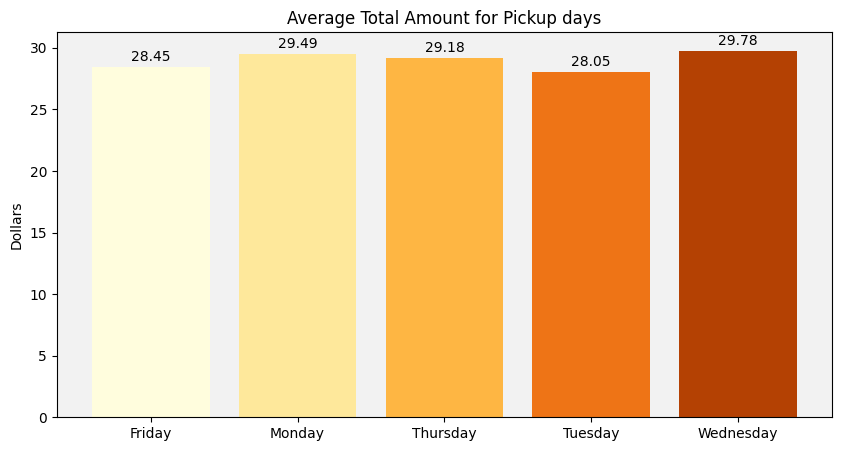

In [163]:
# Average total amount for Pickup Days
plt.figure(figsize=(10,5))
ax = plt.axes()
a13 = taxidf1.groupby(['pickup_day'])['total_amount'].mean()
a13=round(a13,2)
plt.bar(x=range(len(a13)),height=a13.values, color=plt.cm.YlOrBr(range(6,256,250//len(a13))))

for i, value in enumerate(a13.values):
    plt.text(i, value +0.5, str(value), ha='center')
ax.set_facecolor('#F2F2F2')
plt.xticks(labels=a13.index,ticks=range(len(a13)))
plt.title('Average Total Amount for Pickup days')
plt.ylabel('Dollars')
plt.show()

**Inference**

The average total amount for the Wednesdays(29.78 dollars) are the highest and the least is on Tuesdays(28.05 dollars)

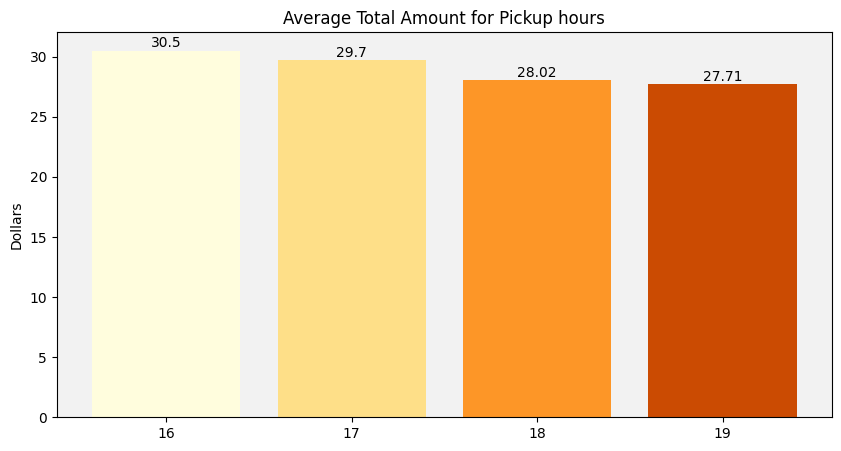

In [164]:
# Average Total Amount for Pickup Hours
plt.figure(figsize=(10,5))
ax = plt.axes()
a19 = taxidf1.groupby(['pickup_hour'])['total_amount'].mean()
a19=round(a19,2)
plt.bar(x=range(len(a19)),height=a19.values, color=plt.cm.YlOrBr(range(6,256,250//len(a19))))

for i, value in enumerate(a19.values):
    plt.text(i, value +0.3, str(value), ha='center')
ax.set_facecolor('#F2F2F2')
plt.xticks(labels=a19.index,ticks=range(len(a19)))
plt.title('Average Total Amount for Pickup hours')
plt.ylabel('Dollars')
plt.show()

**Inference**

The average total amount for pickups at  4PM is the highest with 30.5 dollars and the least is at 9PM with 27.71 dollars.

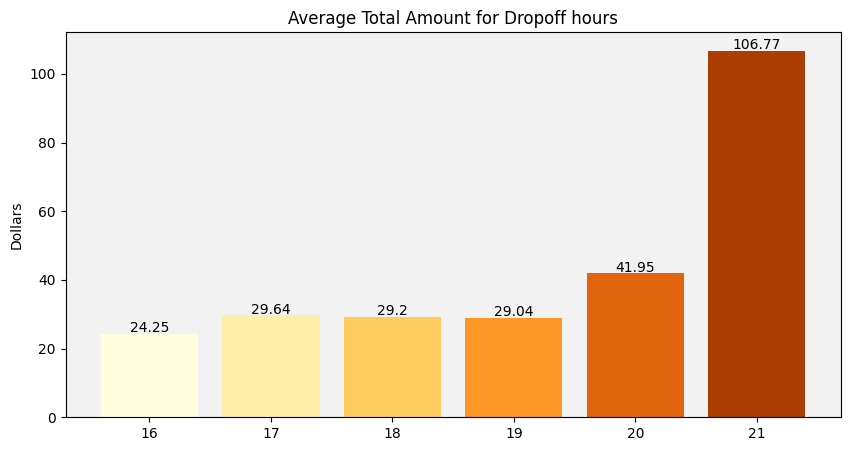

In [165]:
# Average total amount for Dropoff hours
plt.figure(figsize=(10,5))
ax = plt.axes()
a20 = taxidf1.groupby(['drop_hour'])['total_amount'].mean()
a20=round(a20,2)
plt.bar(x=range(len(a20)),height=a20.values, color=plt.cm.YlOrBr(range(6,256,250//len(a20))))

for i, value in enumerate(a20.values):
    plt.text(i, value +0.5, str(value), ha='center')
ax.set_facecolor('#F2F2F2')
plt.xticks(labels=a20.index,ticks=range(len(a20)))
plt.title('Average Total Amount for Dropoff hours')
plt.ylabel('Dollars')
plt.show()

**Inference**

The average total amount for dropoffs at  9PM is the highest with 106.77 dollars and the least is at 4PM with 24.25 dollars.

In [156]:
# Congestion surcharge vs Pickup Borough
# creating a crosstab of congestion surcharge with pickup Boroughs as cs_pub
cs_pub = pd.crosstab(taxidf1["PU_Borough"], df["congestion_surcharge"])
cs_pub

congestion_surcharge   0.0     2.5
PU_Borough                        
Bronx                   24       3
Brooklyn               172     120
Manhattan             2072  112549
Queens                4392    6995

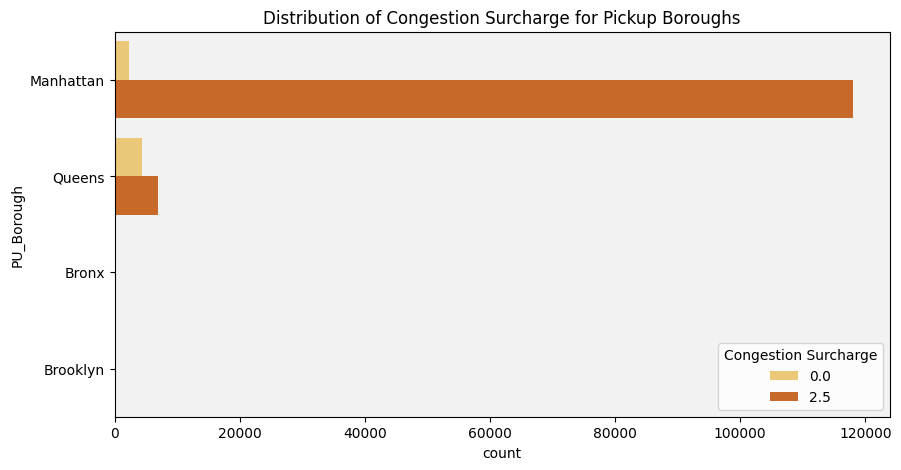

In [167]:
# Congestion surcharge vs Pickup Borough
plt.figure(figsize=(10,5))

ax = plt.axes()
ax.set_facecolor('#F2F2F2')
sns.countplot(y=taxidf1["PU_Borough"], hue=taxidf1["congestion_surcharge"], palette="YlOrBr")
legend = plt.legend(title="Congestion Surcharge", loc="lower right")
plt.setp(legend.get_title(), fontsize='medium') 
plt.title('Distribution of Congestion Surcharge for Pickup Boroughs')
plt.show()

**Inference**

Manhattan has the highest trips with congestion surcharges.

In [168]:
# bivariate analysis of congestion surcharge and drop off borough

# creating a crosstab of congestion surcharge with dropoff Boroughs as cs_dob
cs_dob = pd.crosstab(taxidf1["congestion_surcharge"], taxidf1["DO_Borough"])
cs_dob

DO_Borough            Bronx  Brooklyn  EWR  Manhattan  Queens  Staten Island
congestion_surcharge                                                        
0.0                     281      1762  264       2546    2057             14
2.5                     216      2030    5     120175    2652             11

In [169]:
round(taxidf1[(taxidf1['DO_Borough']=='Manhattan')&(taxidf1["congestion_surcharge"]==2.5)].shape[0]/len(taxidf1)*100,2)

91.03

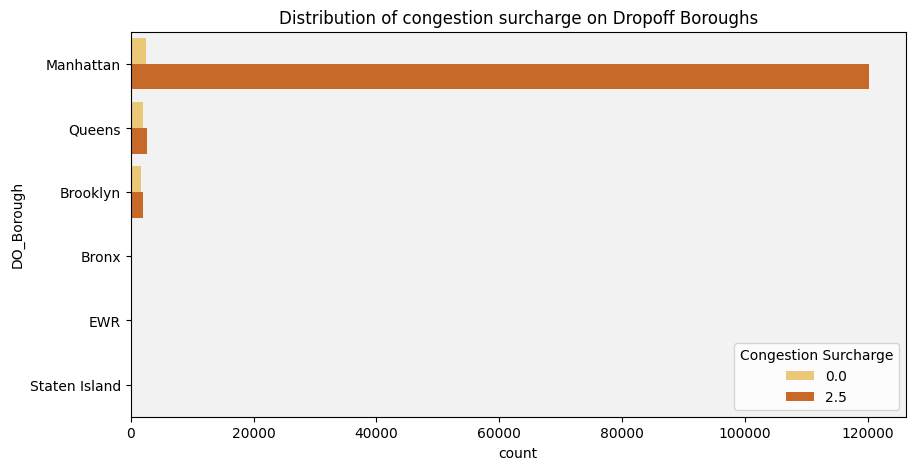

In [170]:
plt.figure(figsize=(10,5))

ax = plt.axes()
# Setting the background color of the plot
# using set_facecolor() method
ax.set_facecolor("#F2F2F2")

sns.countplot(y=taxidf1["DO_Borough"], hue=taxidf1["congestion_surcharge"], palette="YlOrBr")

legend = plt.legend(title="Congestion Surcharge", loc="lower right")
plt.setp(legend.get_title(), fontsize='medium') 
plt.title('Distribution of congestion surcharge on Dropoff Boroughs')
plt.show()

**Inferencce**

Most Trips were to Manahattan for which the congestion surcharge was charged 91.03 %</br>

In [171]:
# analysis of congestion surcharge with airport trips with fees
taxidf1["congestion_surcharge"][taxidf1["Airport_fee"] == 1.75].shape

(10381,)

In [172]:
# crosstab 
pd.crosstab(taxidf1["congestion_surcharge"],taxidf1["Airport_fee"])

Airport_fee             0.00  1.75
congestion_surcharge              
0.0                     2952  3972
2.5                   118680  6409

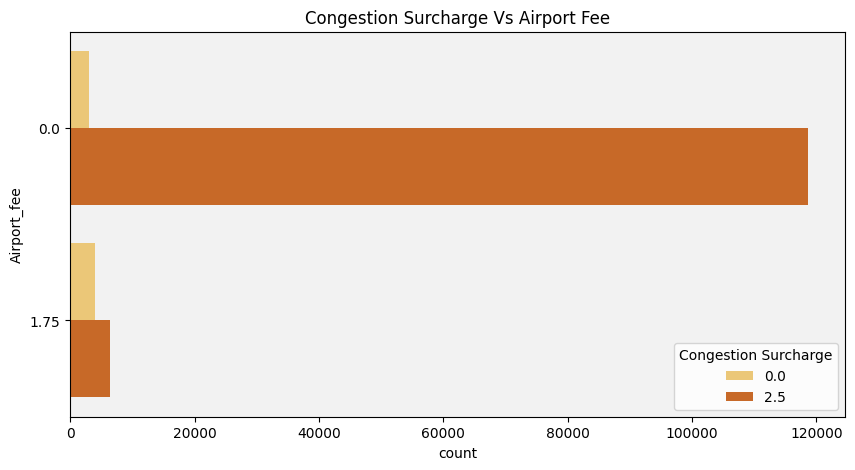

In [173]:
plt.figure(figsize=(10,5))

ax = plt.axes()
# Setting the background color of the plot
# using set_facecolor() method
ax.set_facecolor("#F2F2F2")

sns.countplot(y=taxidf1["Airport_fee"], hue=taxidf1["congestion_surcharge"], palette="YlOrBr")

legend = plt.legend(title="Congestion Surcharge", loc="lower right")
plt.setp(legend.get_title(), fontsize='medium') 
plt.title('Congestion Surcharge Vs Airport Fee')
plt.show()

**Inference**

(118682) 94.76% trips had congestion surcharge out of the (6409) 4.85 % trips where there were airport fees.</br>

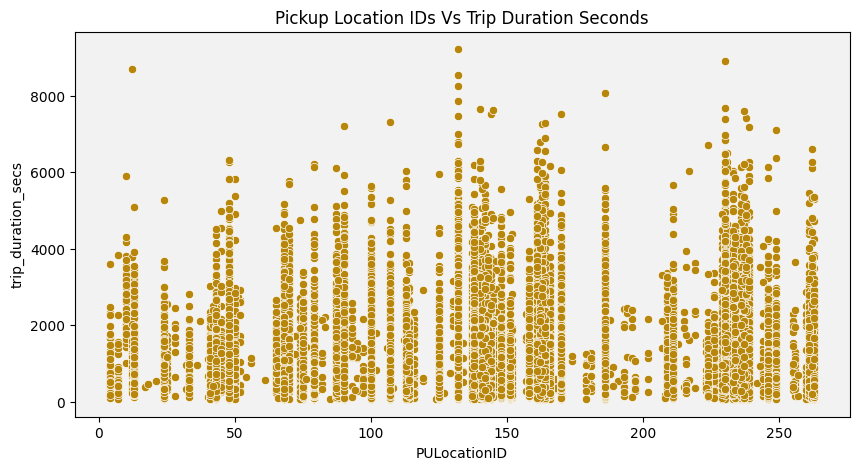

In [176]:
# analysis of pick up location with trip duration
plt.figure(figsize=(10,5))

ax = plt.axes()
# Setting the background color of the plot
# using set_facecolor() method
ax.set_facecolor("#F2F2F2")
sns.scatterplot(x=taxidf1["PULocationID"], y= taxidf1["trip_duration_secs"], color="darkgoldenrod")
plt.title('Pickup Location IDs Vs Trip Duration Seconds')
plt.show()

**Inference**

There is no correlation between PULocationID and trip duration.</br>

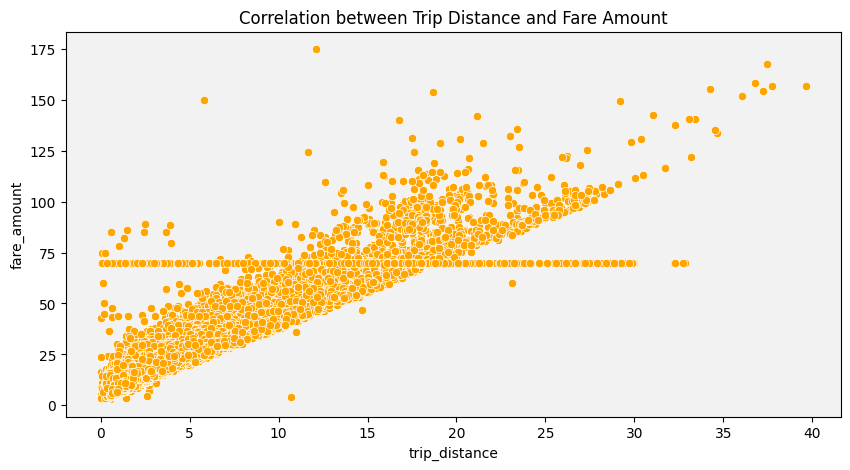

In [179]:
# trip distance with fare amount
plt.figure(figsize=(10,5))

custom_palette = sns.color_palette("YlOrBr", 5)

ax = plt.axes()
# Setting the background color of the plot
# using set_facecolor() method
ax.set_facecolor("#F2F2F2")
sns.scatterplot(x=taxidf1["trip_distance"], y= taxidf1["fare_amount"], color= 'orange')
plt.title('Correlation between Trip Distance and Fare Amount')
plt.show()

**Inference**

1) Trip distance and fare_amount are highly correlated.</br>
2) Also, there is a constant value of fare amount 70 dollars observed for several trip distances (This may look like an anomaly, but the fare amount of trips between Manhattan and JFK airports have a flat rate of 70 dollars)

<b>Multi-Variate Analysis</b>

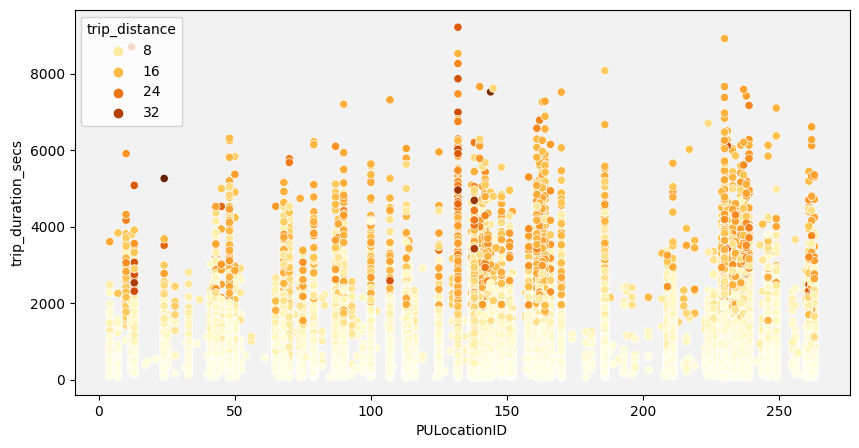

In [182]:
# Analysis of pick up location with trip duration and trip distance

plt.figure(figsize=(10,5))
ax = plt.axes()
# Setting the background color of the plot
# using set_facecolor() method
ax.set_facecolor("#F2F2F2")
custom_palette = sns.color_palette("YlOrBr", 5)
sns.scatterplot(x=taxidf1["PULocationID"], y= taxidf1["trip_duration_secs"], hue= taxidf1["trip_distance"], palette="YlOrBr")
plt.show()

**Inference**

1) Most of trip distances are betwen 0 to 30 miles across all PUlocationID.</br>
2) As the trip duration increases trip distance also increases.

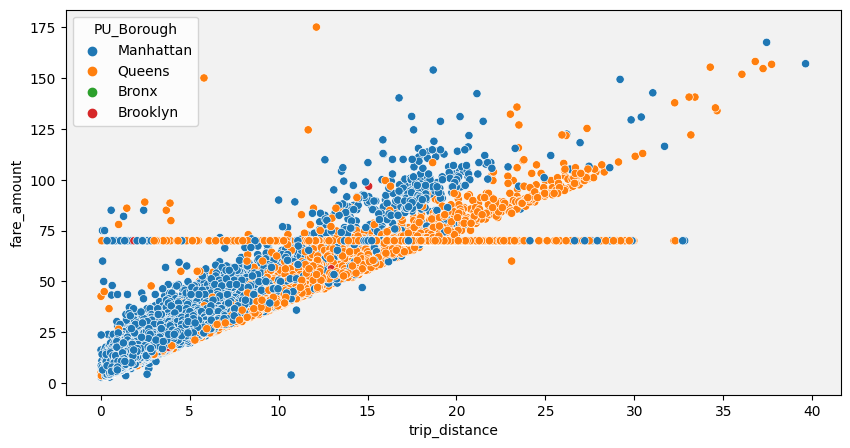

In [183]:
# trip distance with fare amount and Pickup Borough

plt.figure(figsize=(10,5))

custom_palette = sns.dark_palette("orange", n_colors=5, reverse=True)

ax = plt.axes()
# Setting the background color of the plot
# using set_facecolor() method
ax.set_facecolor("#F2F2F2")

sns.scatterplot(x=taxidf1["trip_distance"], y= taxidf1["fare_amount"], hue=taxidf1["PU_Borough"])
plt.show()

**Inference**

1) For similar trip distances, most trips starting from Manhattan has more fare amounts than the other boroughs.</br>

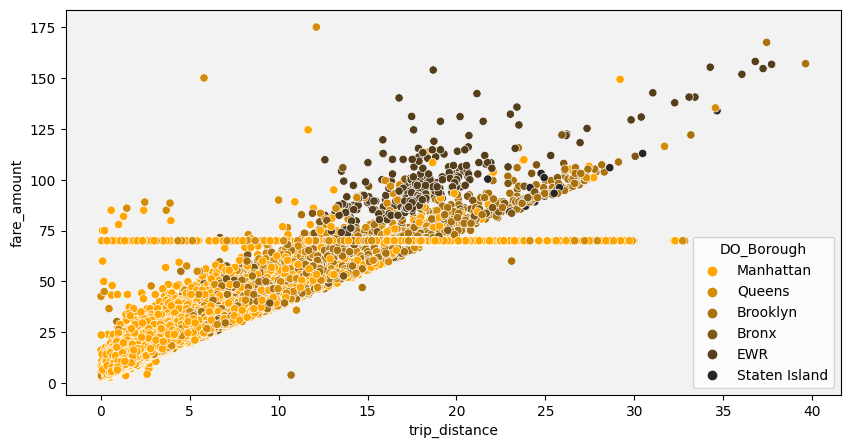

In [184]:
# trip distance with fare amount and Drop Borough

plt.figure(figsize=(10,5))

custom_palette = sns.dark_palette("orange", n_colors=6, reverse=True)

ax = plt.axes()
# Setting the background color of the plot
# using set_facecolor() method
ax.set_facecolor("#F2F2F2")

sns.scatterplot(x=taxidf1["trip_distance"], y= taxidf1["fare_amount"], hue=taxidf1["DO_Borough"], palette=custom_palette)
plt.show()

**Inference**

1) As the trip distances increases, the dropoffs concentrated in the EWR borough.</br>
2) The increase of fare amount with the trip distance remains more or less constant accross all the Boroughs.

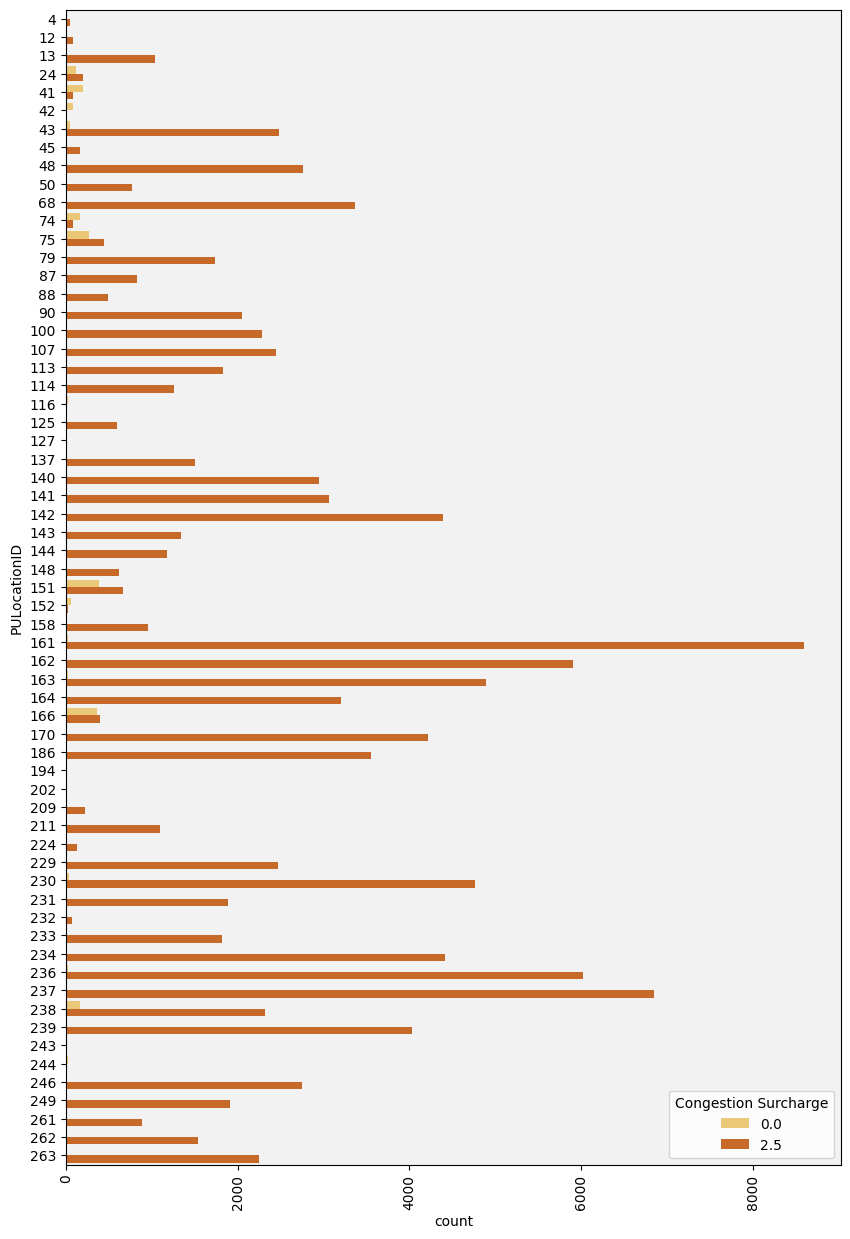

In [188]:
# checking the location(s) where the frequency of congestion surcharge is most in Manhattan

plt.figure(figsize=(10,15))

ax = plt.axes()

sns.countplot(y=taxidf1["PULocationID"][taxidf1["PU_Borough"] == "Manhattan"], hue=taxidf1["congestion_surcharge"], palette="YlOrBr")
ax.set_facecolor('#F2F2F2')
legend = plt.legend(title="Congestion Surcharge", loc="lower right")
plt.setp(legend.get_title(), fontsize='medium') 

plt.xticks(rotation=90)
plt.show()

In [187]:
pd.crosstab(taxidf1["congestion_surcharge"], taxidf1["PULocationID"][taxidf1["PULocationID"].isin([161,236,237])])

PULocationID           161   236   237
congestion_surcharge                  
0.0                     27    21    14
2.5                   8598  6029  6850

In [ ]:
# The highest congestion surcharge with $2.5 was in PULocationID 161

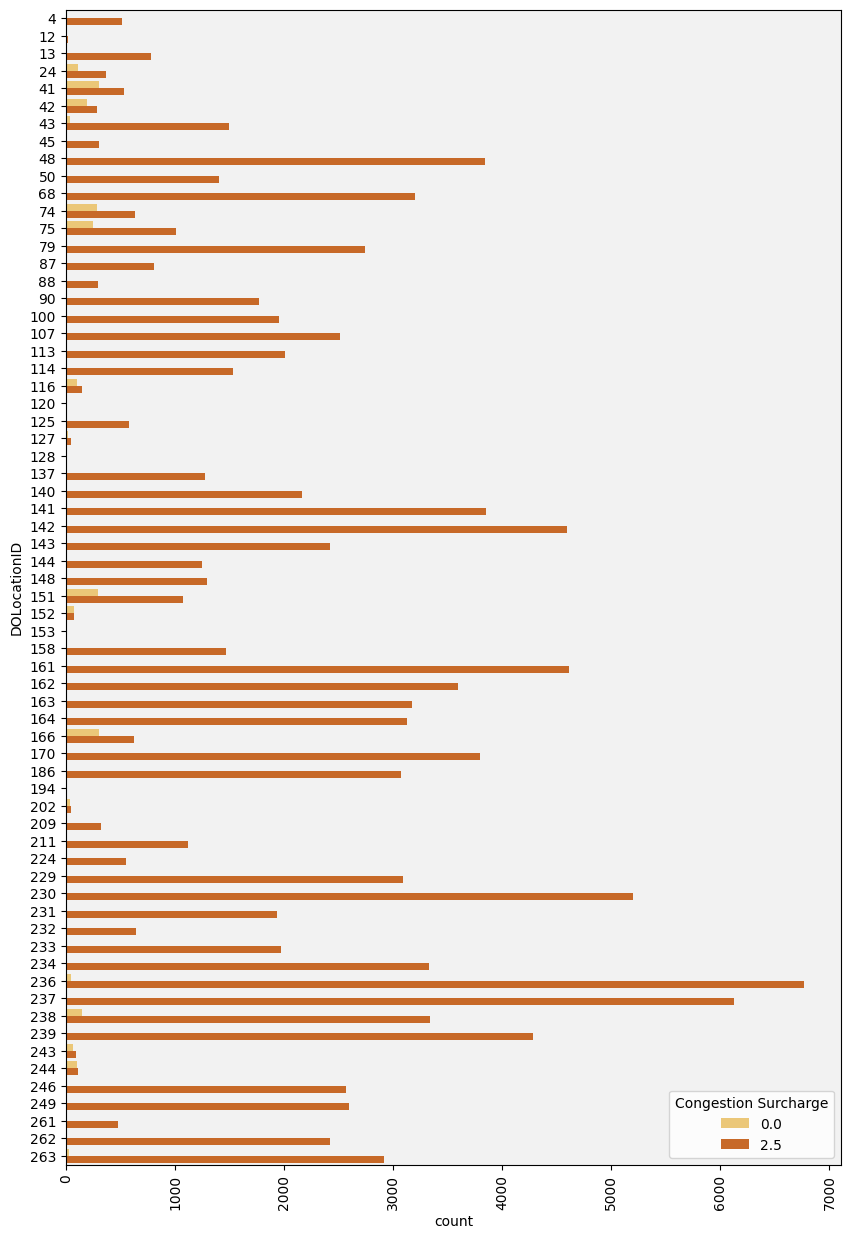

In [189]:
# checking the location(s) where the frequency of congestion surcharge charged is the most in Manhattan

plt.figure(figsize=(10,15))

ax = plt.axes()
# Setting the background color of the plot
# using set_facecolor() method
ax.set_facecolor("#F2F2F2")

sns.countplot(y=taxidf1["DOLocationID"][taxidf1["DO_Borough"] == "Manhattan"], hue=taxidf1["congestion_surcharge"], palette="YlOrBr")

legend = plt.legend(title="Congestion Surcharge", loc="lower right")
plt.setp(legend.get_title(), fontsize='medium') 

plt.xticks(rotation=90)
plt.show()

In [190]:
pd.crosstab(taxidf1["congestion_surcharge"], taxidf1["DOLocationID"][taxidf1["DOLocationID"].isin([161,236,237])])

DOLocationID           161   236   237
congestion_surcharge                  
0.0                      6    45     5
2.5                   4608  6767  6129

In [ ]:
# The highest congestion surcharge with $2.5 was in DULocationID 236

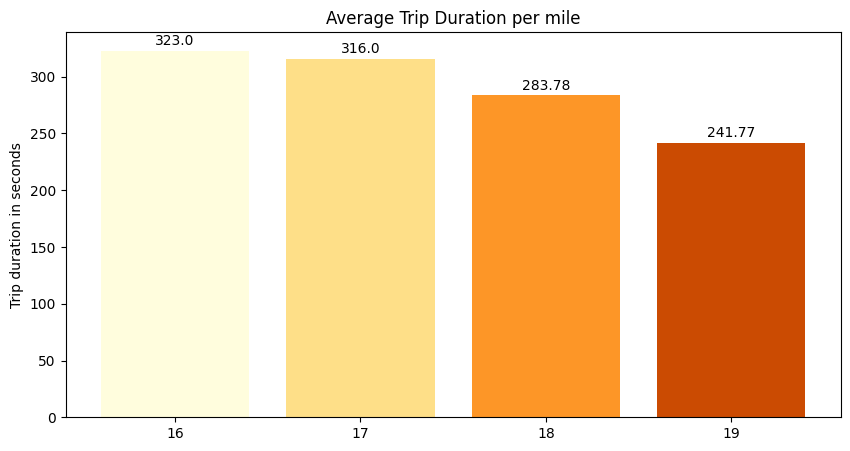

In [191]:
# trip duration vc trip distance vs pickup hour
plt.figure(figsize=(10,5))

avg_time_per_mile = taxidf1['trip_duration_secs'].mean()/taxidf1['trip_distance'].mean()

a9 = taxidf1.groupby(['pickup_hour'])[['trip_duration_secs','trip_distance']].mean()
a9=round(a9,2)
height=round(a9['trip_duration_secs']/a9['trip_distance'],2)
plt.bar(x=range(len(a9)),height=height, color=plt.cm.YlOrBr(range(6,256,250//len(a9))))

for i, value in enumerate(height):
    plt.text(i, value +5, str(value), ha='center')
plt.xticks(labels=a9.index,ticks=range(len(a9)))
plt.ylabel('Trip duration in seconds')
plt.title('Average Trip Duration per mile')
plt.show()

**Inference**

The average trip duration per mile for pickups is the highest at 4PM with the value of 321.46 seconds and the least being 7 PM with the value of 240.03 seconds.

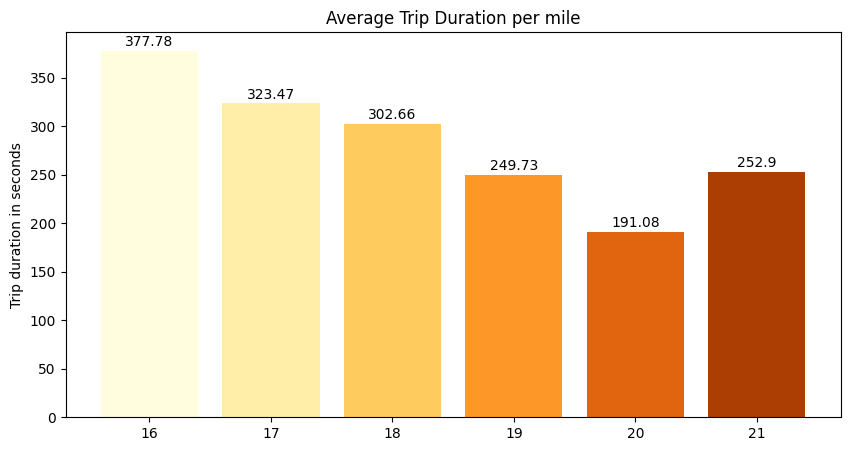

In [194]:
# trip duration vc trip distance vs dropoff hour
plt.figure(figsize=(10,5))

avg_time_per_mile = taxidf1['trip_duration_secs'].mean()/taxidf1['trip_distance'].mean()

a10 = taxidf1.groupby(['drop_hour'])[['trip_duration_secs','trip_distance']].mean()
a10=round(a10,2)
height=round(a10['trip_duration_secs']/a10['trip_distance'],2)
plt.bar(x=range(len(a10)),height=height, color=plt.cm.YlOrBr(range(6,256,250//len(a10))))

for i, value in enumerate(height):
    plt.text(i, value +5, str(value), ha='center')
plt.xticks(labels=a10.index,ticks=range(len(a10)))
plt.ylabel('Trip duration in seconds')
plt.title('Average Trip Duration per mile')
plt.show()

**Inference**

The average trip duration per mile for dropoffs is the highest at 4PM with the value of 375.22 seconds and the least being 8PM with the value of 190.39 seconds.

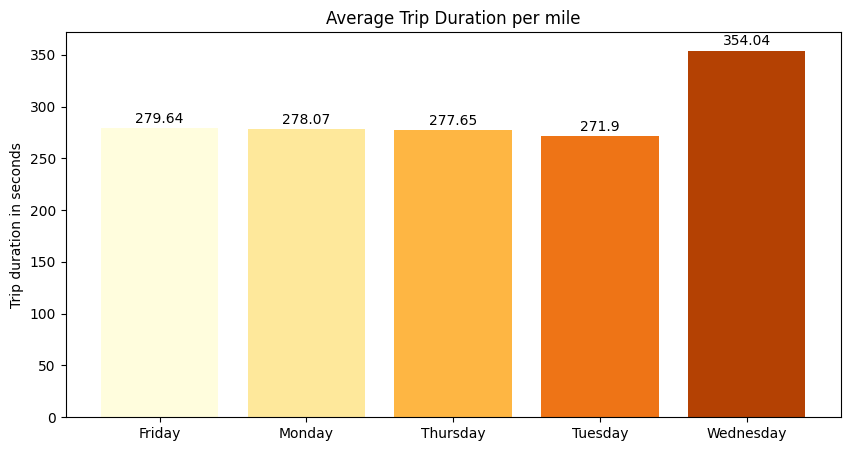

In [196]:
# trip duration vs trip distance vs pickup day
plt.figure(figsize=(10,5))

avg_time_per_mile = taxidf1['trip_duration_secs'].mean()/taxidf1['trip_distance'].mean()

a11 = taxidf1.groupby(['pickup_day'])[['trip_duration_secs','trip_distance']].mean()
a11=round(a11,2)
height=round(a11['trip_duration_secs']/a11['trip_distance'],2)
plt.bar(x=range(len(a11)),height=height, color=plt.cm.YlOrBr(range(6,256,250//len(a11))))

for i, value in enumerate(height):
    plt.text(i, value +5, str(value), ha='center')
plt.xticks(labels=a11.index,ticks=range(len(a11)))
plt.ylabel('Trip duration in seconds')
plt.title('Average Trip Duration per mile')
plt.show()

**Inference**

The average trip duration per mile on Wednesdays is the highest with the value 352.15 seconds and the least is on Tuesdays with 352.15 seconds. The dropoff days will have the same days for the highest and the least trip durations per second.

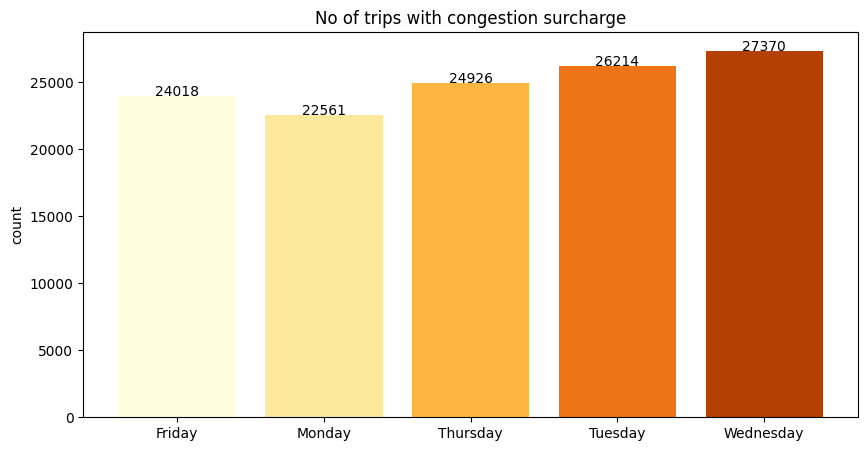

In [198]:
# congestion surcharge vs trip distance vs pickup day
plt.figure(figsize=(10,5))
a14 = taxidf1[taxidf1['congestion_surcharge']!=0].groupby('pickup_day')['trip_distance'].count()
a14=round(a14,2)
plt.bar(x=range(len(a14)),height=a14.values, color=plt.cm.YlOrBr(range(6,256,250//len(a14))))

for i, value in enumerate(a14.values):
    plt.text(i, value +0.5, str(value), ha='center')
plt.xticks(labels=a14.index,ticks=range(len(a14)))
plt.title('No of trips with congestion surcharge')
plt.ylabel('count')
plt.show()

**Inference**

The number of trips are highest on Wednesdays with 26063.

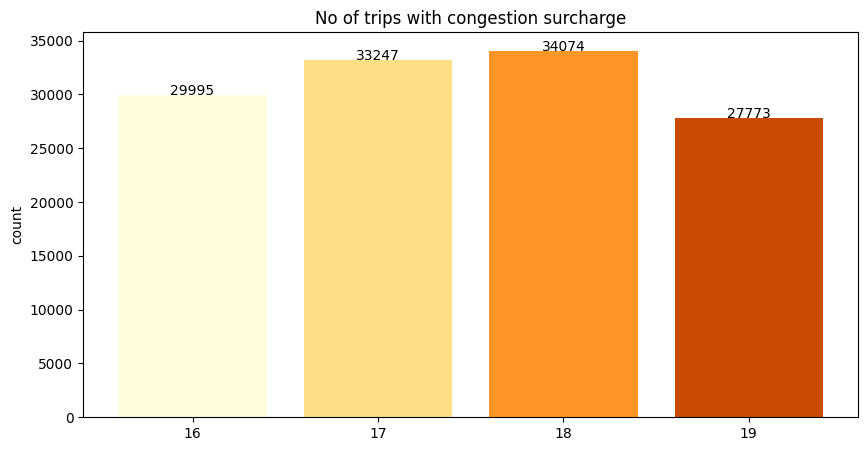

In [199]:
# congestion surcharge vs pickup hour vs trip distance
plt.figure(figsize=(10,5))
a17 = taxidf1[taxidf1['congestion_surcharge']!=0].groupby('pickup_hour')['trip_distance'].count()
a17=round(a17,2)
plt.bar(x=range(len(a17)),height=a17.values, color=plt.cm.YlOrBr(range(6,256,250//len(a17))))

for i, value in enumerate(a17.values):
    plt.text(i, value +0.5, str(value), ha='center')
plt.xticks(labels=a17.index,ticks=range(len(a17)))
plt.title('No of trips with congestion surcharge')
plt.ylabel('count')
plt.show()

**Inference**

The number of trips with congestion charge for pickups is highest at 6PM with the value 32647 and the least is at 7PM with the value 26668.

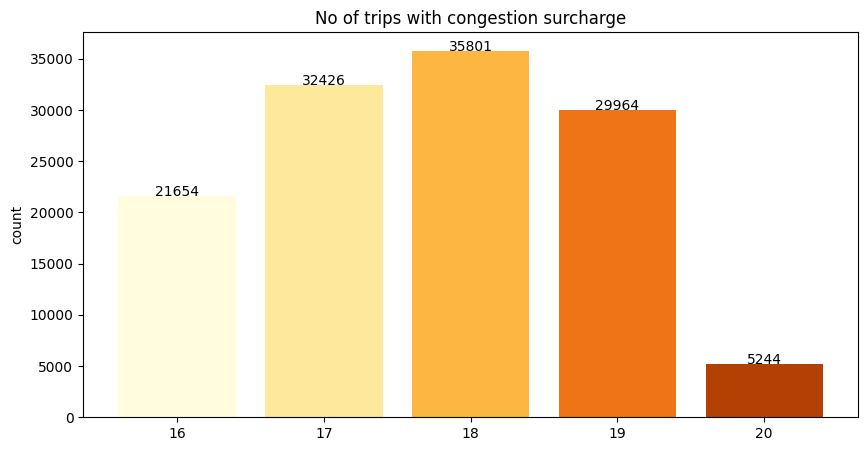

In [200]:
# congestion surcharge vs drop hour vs trip distance
plt.figure(figsize=(10,5))
a16 = taxidf1[taxidf1['congestion_surcharge']!=0].groupby('drop_hour')['trip_distance'].count()
a16=round(a16,2)
plt.bar(x=range(len(a16)),height=a16.values, color=plt.cm.YlOrBr(range(6,256,250//len(a16))))

for i, value in enumerate(a16.values):
    plt.text(i, value +0.5, str(value), ha='center')
plt.xticks(labels=a16.index,ticks=range(len(a16)))
plt.title('No of trips with congestion surcharge')
plt.ylabel('count')
plt.show()

**Inference**

The number of trips with congestion charge for dropoffs is highest at 6PM with the value 34359 and the least at 8 PM with only 5200 trip.

<b>Top 5 less Congested Routes</b>

In [ ]:
# pickup_day  PULocationID  DOLocationID  time_per_mile  time_per_mile_rank

In [201]:
import math
def bbb(group):
#     ran = group.max() - group.min()
    if group.max() == group.min():
        l=[round(math.floor(group.min())), round(math.ceil(group.max()+1))]    

    else:
        #     print(group.min())
        #     print(group.max())
        val = np.round(math.floor(group.min()))

        l=[val]
        while (val<group.max()):
            val=val+2
            l.append(val)
        else:
            if (val!=group.max()) & (val<group.max()):
                l.append(math.ceil(group.max()))
    return group.value_counts(bins=l)

In [202]:
d1 = pd.DataFrame((df.groupby(['PULocationID','DOLocationID'])['trip_distance'].apply(bbb)))

d1 = d1.reset_index()

d1.head(10)

PULocationID  DOLocationID        level_2  trip_distance
0             4            13   (2.999, 5.0]              1
1             4            35   (6.999, 9.0]              1
2             4            48   (2.999, 5.0]              1
3             4            68   (1.999, 4.0]              1
4             4            79  (-0.001, 2.0]              7
5             4            90   (0.999, 3.0]              2
6             4           107  (-0.001, 2.0]              2
7             4           113   (0.999, 3.0]              1
8             4           114   (0.999, 3.0]              3
9             4           129   (6.999, 9.0]              1

In [203]:
d1['dist_lower_bound']=round(d1.level_2.map(lambda x: np.abs(x.left)))
d1['dist_upper_bound']=round(d1.level_2.map(lambda x: x.right))

In [204]:
d2 = d1.copy()

d2 = d2.drop(columns = 'level_2')

In [205]:
d2.isnull().sum()

PULocationID        0
DOLocationID        0
trip_distance       0
dist_lower_bound    0
dist_upper_bound    0
dtype: int64

In [206]:
d2 = d2.rename(columns = {'trip_distance' : 'trip_occurence'})

In [207]:
d2.isnull().sum()

PULocationID        0
DOLocationID        0
trip_occurence      0
dist_lower_bound    0
dist_upper_bound    0
dtype: int64

In [208]:
for i in range(0,len(d2)):
    puid = d2.iloc[i,0]
    doid = d2.iloc[i,1]
    distl = d2.iloc[i,3]
    distu = d2.iloc[i,4]
    d2.loc[i,'Count_of_congestion_surcharge'] = df[(df.PULocationID == puid) & (df.DOLocationID == doid) & (df.trip_distance >= distl) & (df.trip_distance < distu) & (df.congestion_surcharge == 2.5)]['congestion_surcharge'].count()

In [209]:
# removing the duplicates
d3 = d2[d2.duplicated(subset= ['PULocationID', 'DOLocationID'], keep = False)]

d3.head(10)

PULocationID  DOLocationID  trip_occurence  dist_lower_bound  \
34             7           138               2               2.0   
35             7           138               1               0.0   
52            10           114               1              14.0   
53            10           114               1              16.0   
59            10           162               2              13.0   
60            10           162               1              17.0   
61            10           162               0              15.0   
62            10           163               3              13.0   
63            10           163               1              15.0   
72            10           230               1              13.0   

    dist_upper_bound  Count_of_congestion_surcharge  
34               4.0                            0.0  
35               2.0                            0.0  
52              16.0                            1.0  
53              18.0                            1.0  
59              15.0                            2.0  
60              19.0                            1.0  
61              17.0                            0.0  
62              15.0                            2.0  
63              17.0                            2.0  
72              15.0                            1.0

In [210]:
# removing the trip_distance where the occurence is less than or equal to 1
d4 = d3[d3['trip_occurence']>1]

In [211]:
d4.isnull().sum()

PULocationID                     0
DOLocationID                     0
trip_occurence                   0
dist_lower_bound                 0
dist_upper_bound                 0
Count_of_congestion_surcharge    0
dtype: int64

In [212]:
pairids = d3[d3['Count_of_congestion_surcharge'] == 0][['PULocationID', 'DOLocationID']]

In [213]:
pairids = pairids[pairids.duplicated(['PULocationID', 'DOLocationID'],keep = False)]

In [214]:
pairids.head()

PULocationID  DOLocationID
34             7           138
35             7           138
82            12            13
83            12            13
84            12            13

In [215]:
d4[(d4['PULocationID'] == 263) & (d4['DOLocationID'] == 249)]

PULocationID  DOLocationID  trip_occurence  dist_lower_bound  \
9265           263           249               8               4.0   
9266           263           249               2               6.0   

      dist_upper_bound  Count_of_congestion_surcharge  
9265               6.0                            8.0  
9266               8.0                            2.0

In [216]:
d4[d4['Count_of_congestion_surcharge'] > d4['trip_occurence']]

PULocationID  DOLocationID  trip_occurence  dist_lower_bound  \
162             13            79              29               4.0   
203             13           144               5               2.0   
219             13           170              14               6.0   
240             13           233              13               6.0   
491             43            43               4               2.0   
...            ...           ...             ...               ...   
9156           263            43              11               2.0   
9165           263            74              41               2.0   
9168           263            79               8               5.0   
9186           263           132               2              19.0   
9259           263           238              14               2.0   

      dist_upper_bound  Count_of_congestion_surcharge  
162                6.0                           30.0  
203                4.0                            6.0  
219                8.0                           15.0  
240                8.0                           14.0  
491                4.0                            5.0  
...                ...                            ...  
9156               4.0                           12.0  
9165               4.0                           43.0  
9168               7.0                            9.0  
9186              21.0                            3.0  
9259               4.0                           16.0  

[407 rows x 6 columns]

In [217]:
d4[(d4['PULocationID'] == 12) & (d4['DOLocationID'] == 230)]

PULocationID  DOLocationID  trip_occurence  dist_lower_bound  \
117            12           230               6               6.0   
118            12           230               5               4.0   

     dist_upper_bound  Count_of_congestion_surcharge  
117               8.0                            6.0  
118               6.0                            5.0

In [218]:
df[(df['PULocationID'] == 12) & (df['DOLocationID'] == 230)]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
272912        2  2023-04-03 17:02:53   2023-04-03 17:29:30                2   
280277        2  2023-04-03 18:25:25   2023-04-03 18:50:41                3   
363201        2  2023-04-04 16:13:57   2023-04-04 16:45:22                1   
364072        1  2023-04-04 16:26:16   2023-04-04 17:02:59                4   
579181        2  2023-04-06 16:54:59   2023-04-06 17:20:50                2   
579364        2  2023-04-06 16:16:57   2023-04-06 16:43:27                1   
579669        2  2023-04-06 16:32:37   2023-04-06 17:01:55                2   
581833        1  2023-04-06 16:41:15   2023-04-06 17:09:06                1   
582560        2  2023-04-06 16:59:38   2023-04-06 17:24:56                1   
585990        1  2023-04-06 17:46:16   2023-04-06 18:11:47                3   
686250        2  2023-04-07 16:30:59   2023-04-07 17:04:44                4   
689086        1  2023-04-07 16:37:48   2023-04-07 17:02:13                1   

        trip_distance RatecodeID store_and_fwd_flag  PULocationID  \
272912           4.84        1.0                  N            12   
280277           6.39        1.0                  N            12   
363201           6.45        1.0                  N            12   
364072           8.60        1.0                  N            12   
579181           5.95        1.0                  N            12   
579364           6.73        1.0                  N            12   
579669           5.54        1.0                  N            12   
581833           6.20        1.0                  N            12   
582560           5.46        1.0                  N            12   
585990           4.90        1.0                  N            12   
686250           6.41        1.0                  N            12   
689086           6.30        1.0                  N            12   

        DOLocationID payment_type  fare_amount  extra  mta_tax  tip_amount  \
272912           230            2         28.2    2.5      0.5        0.00   
280277           230            1         32.4    2.5      0.5        7.78   
363201           230            1         36.6    2.5      0.5        0.00   
364072           230            1         40.1    2.5      0.5        1.00   
579181           230            2         33.1    2.5      0.5        0.00   
579364           230            1         33.8    2.5      0.5        5.00   
579669           230            1         30.3    2.5      0.5        5.00   
581833           230            1         33.1    2.5      0.5        7.90   
582560           230            1         29.6    2.5      0.5        7.22   
585990           230            2         26.1    2.5      0.5        0.00   
686250           230            2         37.3    2.5      0.5        0.00   
689086           230            2         31.0    2.5      0.5        0.00   

        tolls_amount  improvement_surcharge  total_amount  \
272912           0.0                    1.0         34.70   
280277           0.0                    1.0         46.68   
363201           0.0                    1.0         43.10   
364072           0.0                    1.0         47.60   
579181           0.0                    1.0         39.60   
579364           0.0                    1.0         45.30   
579669           0.0                    1.0         41.80   
581833           0.0                    1.0         47.50   
582560           0.0                    1.0         43.32   
585990           0.0                    1.0         32.60   
686250           0.0                    1.0         43.80   
689086           0.0                    1.0         37.50   

        congestion_surcharge  Airport_fee PU_Borough       PU_Zone  \
272912                   2.5          0.0  Manhattan  Battery Park   
280277                   2.5          0.0  Manhattan  Battery Park   
363201                   2.5          0.0  Manhattan  Battery 

In [219]:
df[(df['PULocationID'] == 10) & (df['DOLocationID'] == 163)]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
278127        2  2023-04-03 18:32:51   2023-04-03 19:10:38                2   
472871        1  2023-04-05 16:00:35   2023-04-05 17:04:05                1   
584206        2  2023-04-06 16:01:19   2023-04-06 16:59:32                4   
594638        1  2023-04-06 18:19:54   2023-04-06 19:00:10                1   

        trip_distance RatecodeID store_and_fwd_flag  PULocationID  \
278127          15.00        2.0                  N            10   
472871          15.10        2.0                  N            10   
584206          14.01        2.0                  N            10   
594638          13.70        2.0                  N            10   

        DOLocationID payment_type  fare_amount  extra  mta_tax  tip_amount  \
278127           163            1         70.0    5.0      0.5       17.11   
472871           163            1         70.0    5.0      0.5       17.10   
584206           163            1         70.0    5.0      0.5       17.11   
594638           163            1         70.0    5.0      0.5       15.00   

        tolls_amount  improvement_surcharge  total_amount  \
278127          6.55                    1.0        102.66   
472871          6.55                    1.0        102.65   
584206          6.55                    1.0        102.66   
594638          6.55                    1.0        100.55   

        congestion_surcharge  Airport_fee PU_Borough       PU_Zone  \
278127                   2.5          0.0     Queens  Baisley Park   
472871                   2.5          0.0     Queens  Baisley Park   
584206                   2.5          0.0     Queens  Baisley Park   
594638                   2.5          0.0     Queens  Baisley Park   

       PU_service_zone DO_Borough        DO_Zone DO_service_zone  \
278127       Boro Zone  Manhattan  Midtown North     Yellow Zone   
472871       Boro Zone  Manhattan  Midtown North     Yellow Zone   
584206       Boro Zone  Manhattan  Midtown North     Yellow Zone   
594638       Boro Zone  Manhattan  Midtown North     Yellow Zone   

        trip_duration_secs pickup_date dropoff_date  pickup_hour  drop_hour  \
278127              2267.0  2023-04-03   2023-04-03           18         19   
472871              3810.0  2023-04-05   2023-04-05           16         17   
584206              3493.0  2023-04-06   2023-04-06           16         16   
594638              2416.0  2023-04-06   2023-04-06           18         19   

       pickup_day dropoff_day  
278127     Monday      Monday  
472871  Wednesday   Wednesday  
584206   Thursday    Thursday  
594638   Thursday    Thursday

In [220]:
d4[(d4['PULocationID'] == 10) & (d4['DOLocationID'] == 163)]

PULocationID  DOLocationID  trip_occurence  dist_lower_bound  \
62            10           163               3              13.0   

    dist_upper_bound  Count_of_congestion_surcharge  
62              15.0                            2.0

In [221]:
df[(df['PULocationID'] == 263) & (df['DOLocationID'] == 249)]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
269941        2  2023-04-03 17:49:13   2023-04-03 18:16:07                2   
370425        1  2023-04-04 17:33:09   2023-04-04 18:14:28                1   
378896        2  2023-04-04 18:32:21   2023-04-04 18:53:14                1   
382281        2  2023-04-04 18:20:35   2023-04-04 18:50:03                1   
486378        2  2023-04-05 17:07:39   2023-04-05 17:39:39                2   
500765        1  2023-04-05 19:45:00   2023-04-05 20:13:49                1   
597773        2  2023-04-06 18:34:14   2023-04-06 19:01:51                4   
683524        2  2023-04-07 16:15:06   2023-04-07 16:41:45                1   
698233        1  2023-04-07 18:47:08   2023-04-07 19:10:11                2   
703936        2  2023-04-07 19:37:43   2023-04-07 20:01:51                1   
707019        2  2023-04-07 19:47:51   2023-04-07 20:07:38                1   

        trip_distance RatecodeID store_and_fwd_flag  PULocationID  \
269941           4.51        1.0                  N           263   
370425           6.20        1.0                  N           263   
378896           5.57        1.0                  N           263   
382281           6.87        1.0                  N           263   
486378           4.73        1.0                  N           263   
500765           4.90        1.0                  N           263   
597773           4.69        1.0                  N           263   
683524           4.33        1.0                  N           263   
698233           9.60        1.0                  N           263   
703936           5.35        1.0                  N           263   
707019           4.46        1.0                  N           263   

        DOLocationID payment_type  fare_amount  extra  mta_tax  tip_amount  \
269941           249            1         26.8    2.5      0.5        9.99   
370425           249            1         39.4    2.5      0.5       11.45   
378896           249            1         27.5    2.5      0.5        5.10   
382281           249            1         34.5    2.5      0.5        2.00   
486378           249            1         30.3    2.5      0.5        7.36   
500765           249            1         28.2    2.5      0.5        6.90   
597773           249            1         27.5    2.5      0.5        6.80   
683524           249            1         25.4    2.5      0.5        1.10   
698233           249            1         39.4    2.5      0.5        9.15   
703936           249            1         28.2    2.5      0.5        6.94   
707019           249            1         22.6    2.5      0.5        5.82   

        tolls_amount  improvement_surcharge  total_amount  \
269941           0.0                    1.0         43.29   
370425           0.0                    1.0         57.35   
378896           0.0                    1.0         39.10   
382281           0.0                    1.0         43.00   
486378           0.0                    1.0         44.16   
500765           0.0                    1.0         41.60   
597773           0.0                    1.0         40.80   
683524           0.0                    1.0         33.00   
698233           0.0                    1.0         55.05   
703936           0.0                    1.0         41.64   
707019           0.0                    1.0         34.92   

        congestion_surcharge  Airport_fee PU_Borough         PU_Zone  \
269941                   2.5          0.0  Manhattan  Yorkville West   
370425                   2.5          0.0  Manhattan  Yorkville West   
378896                   2.5          0.0  Manhattan  Yorkville West   
382281                   2.5          0.0  Manhattan  Yorkville West   
486378                   2.5          0.0  Manhattan  Yorkville West   
500765                   2.5          0.0  Manhattan  Yorkville West   
597773                   2.5          0.0  Manhattan  Y

In [226]:
counter = 0
OD_pairs = []
for i in range(0,len(uni_pairs)):
    start = uni_pairs.iloc[i,0]
    end = uni_pairs.iloc[i,1]
    filtered = d3[(d3.PULocationID == start) & (d3.DOLocationID == end)]
    filtered['Rankfilter'] = filtered.dist_upper_bound.rank()
    non_congested = filtered.Count_of_congestion_surcharge.min()
    filteredrank = filtered[filtered.Count_of_congestion_surcharge == non_congested].Rankfilter
    if filteredrank.iloc[0] == 1:
        continue
    else:
        print('Non-congested route:')
        print(filtered[filtered.Count_of_congestion_surcharge == non_congested].to_string())
        print()
        print('Congested route:')
        print(filtered[filtered.Rankfilter ==1].to_string())
        counter+=1
    OD_pairs.append((start,end))

Non-congested route:
    PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
34             7           138               2               2.0               4.0                            0.0         2.0
35             7           138               1               0.0               2.0                            0.0         1.0

Congested route:
    PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
35             7           138               1               0.0               2.0                            0.0         1.0
Non-congested route:
    PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
61            10           162               0              15.0              17.0                            0.0         2.0

Congested route:
    PULocationID  DOLocationID  trip_occ

Non-congested route:
     PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
179            13           114               4               3.0               5.0                            4.0         2.0

Congested route:
     PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
178            13           114              20               1.0               3.0                           20.0         1.0
Non-congested route:
     PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
181            13           125               1               2.0               4.0                            1.0         2.0

Congested route:
     PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
180            13           125  

Non-congested route:
     PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
435            41           239               1               3.0               5.0                            1.0         2.0

Congested route:
     PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
434            41           239               5               1.0               3.0                            5.0         1.0
Non-congested route:
     PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
442            41           263               1               3.0               5.0                            2.0         2.0

Congested route:
     PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
441            41           263  

Non-congested route:
     PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
549            43           141               5               2.0               4.0                            5.0         2.0

Congested route:
     PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
548            43           141              82               0.0               2.0                           82.0         1.0
Non-congested route:
     PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
551            43           142              25               2.0               4.0                           25.0         2.0

Congested route:
     PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
550            43           142  

     PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
616            43           239              10               2.0               4.0                           11.0         2.0

Congested route:
     PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
615            43           239             128               0.0               2.0                          127.0         1.0
Non-congested route:
     PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
622            43           246               1               5.0               7.0                            1.0         3.0

Congested route:
     PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
621            43           246              16       

Non-congested route:
     PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
693            45           163               1               5.0               7.0                            1.0         2.0
694            45           163               1               7.0               9.0                            1.0         3.0

Congested route:
     PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
692            45           163               2               3.0               5.0                            2.0         1.0
Non-congested route:
     PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
696            45           164               1               4.0               6.0                            1.0         2.0
697            45           164               1    

Non-congested route:
     PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
804            48           144               2               4.0               6.0                            2.0         2.0

Congested route:
     PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
803            48           144              15               2.0               4.0                           15.0         1.0
Non-congested route:
     PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
807            48           148               1               5.0               7.0                            1.0         2.0

Congested route:
     PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
806            48           148  

Non-congested route:
     PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
856            48           239              17               2.0               4.0                           20.0         2.0

Congested route:
     PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
855            48           239             102               0.0               2.0                           99.0         1.0
Non-congested route:
     PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
859            48           244               1               7.0               9.0                            1.0         2.0

Congested route:
     PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
858            48           244  

Non-congested route:
     PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
965            50           238               2               3.0               5.0                            2.0         2.0

Congested route:
     PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
964            50           238              20               1.0               3.0                           20.0         1.0
Non-congested route:
     PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
967            50           239               4               2.0               4.0                            7.0         2.0

Congested route:
     PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
966            50           239  

Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
1135            68           113              15               2.0               4.0                           18.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
1134            68           113              74               0.0               2.0                           71.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
1137            68           114              28               2.0               4.0                           28.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
1136            68        

Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
1191            68           170              20               2.0               4.0                           21.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
1190            68           170              70               0.0               2.0                           69.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
1205            68           211               2               3.0               5.0                            3.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
1204            68        

Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
1281            70            42               1               8.0              10.0                            0.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
1280            70            42               4               6.0               8.0                            1.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
1285            70            48               5              11.0              13.0                            5.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
1284            70        

      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
1416            70           224               1              11.0              13.0                            1.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
1415            70           224               2               9.0              11.0                            2.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
1420            70           229               2              10.0              12.0                            2.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
1419            70           229               

Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
1581            75           162               2               3.0               5.0                            2.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
1580            75           162               4               1.0               3.0                            4.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
1590            75           186               1               5.0               7.0                            1.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
1589            75        

      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
1668            79           114              58               0.0               2.0                           58.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
1674            79           132               1              19.0              21.0                            1.0         3.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
1673            79           132               4              15.0              17.0                            4.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
1676            79           137            

Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
1732            79           237               2               4.0               6.0                            2.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
1731            79           237              26               2.0               4.0                           26.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
1734            79           238               4               6.0               8.0                            4.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
1733            79        

Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
1819            87           114               6               3.0               5.0                            6.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
1818            87           114              17               1.0               3.0                           17.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
1825            87           132               0              16.0              18.0                            0.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
1822            87        

Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
1935            88           138               1              15.0              17.0                            1.0         3.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
1934            88           138               3              11.0              13.0                            3.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
1941            88           143               1               7.0               9.0                            1.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
1940            88        

Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
2042            90           112               1               6.0               8.0                            1.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
2041            90           112               3               4.0               6.0                            3.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
2045            90           114               1               2.0               4.0                            1.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
2044            90        

Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
2162           100            13               1               5.0               7.0                            1.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
2161           100            13              21               3.0               5.0                           21.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
2165           100            24               1               5.0               7.0                            1.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
2164           100        

Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
2251           100           162               1               4.0               6.0                            1.0         3.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
2249           100           162              89               0.0               2.0                           88.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
2253           100           163               2               2.0               4.0                            2.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
2252           100        

      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
2316           100           261               6               3.0               5.0                            6.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
2321           100           263               3               4.0               6.0                            3.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
2320           100           263              18               2.0               4.0                           18.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
2330           107            13            

Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
2440           107           233               2               2.0               4.0                            2.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
2439           107           233              90               0.0               2.0                           90.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
2443           107           236               4               4.0               6.0                            7.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
2442           107        

Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
2505           113            88               2               4.0               6.0                            2.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
2504           113            88               4               2.0               4.0                            4.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
2507           113            90               1               2.0               4.0                            1.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
2506           113        

Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
2568           113           234               1               2.0               4.0                            1.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
2567           113           234              92               0.0               2.0                           92.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
2572           113           237               1               4.0               6.0                            1.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
2571           113        

Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
2669           114           230               2               4.0               6.0                            2.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
2668           114           230              37               2.0               4.0                           37.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
2672           114           231               1               4.0               6.0                            1.0         3.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
2670           114        

      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
2768           125           158              19               0.0               2.0                           19.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
2772           125           161               1               4.0               6.0                            1.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
2771           125           161              13               2.0               4.0                           13.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
2783           125           229            

      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
2874           132            22               1              16.0              18.0                            0.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
2878           132            25              23              18.0              20.0                            0.0         4.0
2879           132            25              15              12.0              14.0                            0.0         1.0
2880           132            25               5              20.0              22.0                            0.0         5.0
2881           132            25               2              22.0              24.0                            0.0         6.0
2882           132            25               2              26.0              28.

Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
2973           132            52               4              26.0              28.0                            0.0         7.0
2974           132            52               2              14.0              16.0                            0.0         1.0
2975           132            52               1              18.0              20.0                            0.0         3.0
2976           132            52               1              24.0              26.0                            0.0         6.0
2977           132            52               0              16.0              18.0                            0.0         2.0
2978           132            52               0              20.0              22.0                            0.0         4.0
2979           132            52               0              22.0              24.

      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
3111           132            97               7              11.0              13.0                            0.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
3115           132            98               2               9.0              11.0                            0.0         3.0
3116           132            98               2              11.0              13.0                            0.0         4.0
3117           132            98               2              15.0              17.0                            0.0         6.0
3118           132            98               1               5.0               7.0                            0.0         1.0
3119           132            98               1               7.0               9.

Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
3209           132           132              34               2.0               4.0                            0.0         2.0
3210           132           132              14               0.0               2.0                            0.0         1.0
3211           132           132               5               6.0               8.0                            0.0         4.0
3212           132           132               5               8.0              10.0                            0.0         5.0
3213           132           132               4               4.0               6.0                            0.0         3.0
3214           132           132               2              12.0              14.0                            0.0         7.0
3215           132           132               2              14.0              16.

      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
3338           132           161             117              16.0              18.0                          116.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
3351           132           163              11              22.0              24.0                           11.0         4.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
3349           132           163              70              16.0              18.0                           66.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
3358           132           164            

Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
3459           132           212               1              18.0              20.0                            0.0         2.0
3460           132           212               1              22.0              24.0                            0.0         4.0
3461           132           212               0              20.0              22.0                            0.0         3.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
3458           132           212               5              16.0              18.0                            1.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
3468           132           216            

Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
3562           132           239               1              25.0              27.0                            1.0         4.0
3563           132           239               0              23.0              25.0                            1.0         3.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
3560           132           239              63              19.0              21.0                           62.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
3567           132           243               6              22.0              24.0                            0.0         2.0

Congested route:
      PULocationID  DOLoca

Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
3691           137           112               1               4.0               6.0                            1.0         2.0
3692           137           112               1               6.0               8.0                            1.0         3.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
3690           137           112               2               2.0               4.0                            2.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
3694           137           113               1               3.0               5.0                            1.0         2.0

Congested route:
      PULocationID  DOLoca

Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
3772           138             1               2              33.0              35.0                            0.0         6.0
3774           138             1               1              25.0              27.0                            0.0         2.0
3775           138             1               1              27.0              29.0                            0.0         3.0
3776           138             1               1              31.0              33.0                            0.0         5.0
3777           138             1               0              29.0              31.0                            0.0         4.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
3773           138             1               1              23.

      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
3887           138            74               3               7.0               9.0                            0.0         2.0
3888           138            74               1              11.0              13.0                            0.0         4.0
3890           138            74               0               9.0              11.0                            0.0         3.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
3886           138            74              15               5.0               7.0                            1.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
3902           138            79               1              14.

      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
4001           138           140              26               7.0               9.0                           25.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
4005           138           141               1              12.0              14.0                            1.0         3.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
4003           138           141              63               8.0              10.0                           63.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
4009           138           142            

Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
4099           138           188               6              11.0              13.0                            0.0         2.0
4100           138           188               3               9.0              11.0                            0.0         1.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
4100           138           188               3               9.0              11.0                            0.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
4109           138           194               1               7.0               9.0                            0.0         2.0
4110           138           194            

Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
4219           138           246               2              13.0              15.0                            2.0         3.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
4217           138           246              14               9.0              11.0                           14.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
4225           138           249               1              13.0              15.0                            1.0         3.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
4223           138        

Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
4320           140           137               4               3.0               5.0                            4.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
4319           140           137              30               1.0               3.0                           30.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
4322           140           138               1              10.0              12.0                            1.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
4321           140        

Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
4389           140           237               1               2.0               4.0                            1.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
4388           140           237             208               0.0               2.0                          208.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
4391           140           238              21               3.0               5.0                           21.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
4390           140        

      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
4452           141           100              18               1.0               3.0                           17.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
4455           141           107              13               3.0               5.0                           14.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
4454           141           107              31               1.0               3.0                           30.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
4459           141           112            

Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
4537           141           230               2               3.0               5.0                            2.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
4536           141           230              42               1.0               3.0                           42.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
4539           141           231               3               6.0               8.0                            3.0         2.0
4540           141           231               3               8.0              10.0                            3.0         3.0

Congested route:
      PULocationID  DOLoca

Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
4607           142            90               1               3.0               5.0                            3.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
4606           142            90              23               1.0               3.0                           21.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
4612           142           100               8               2.0               4.0                            8.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
4611           142        

Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
4657           142           162              17               2.0               4.0                           18.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
4656           142           162              77               0.0               2.0                           76.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
4659           142           163               1               2.0               4.0                            1.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
4658           142        

      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
4721           143            24               2               3.0               5.0                            2.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
4720           143            24              18               1.0               3.0                           18.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
4725           143            41               1               4.0               6.0                            1.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
4724           143            41              1

      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
4799           143           231               1               5.0               7.0                            1.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
4798           143           231               5               3.0               5.0                            5.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
4804           143           236               4               3.0               5.0                            5.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
4803           143           236              6

Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
4862           144           107               5               2.0               4.0                            5.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
4861           144           107              35               0.0               2.0                           35.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
4872           144           138               0              12.0              14.0                            0.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
4870           144        

Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
5020           148            13               2               3.0               5.0                            2.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
5019           148            13               6               1.0               3.0                            6.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
5028           148            45               1              12.0              14.0                            0.0         7.0
5029           148            45               0               2.0               4.0                            0.0         2.0
5030           148            45            

Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
5121           148           237               1               5.0               7.0                            1.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
5120           148           237               2               3.0               5.0                            2.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
5124           148           239               1               7.0               9.0                            1.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
5123           148        

Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
5279           158            68               1               2.0               4.0                            1.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
5278           158            68              36               0.0               2.0                           36.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
5286           158            87               1               4.0               6.0                            1.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
5285           158        

      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
5346           158           232               1               5.0               7.0                            1.0         3.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
5344           158           232               3               1.0               3.0                            3.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
5349           158           234               3               2.0               4.0                            3.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
5348           158           234              3

Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
5483           161           143               1               3.0               5.0                            1.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
5481           161           143             146               1.0               3.0                          146.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
5486           161           144               1               6.0               8.0                            1.0         3.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
5484           161        

Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
5595           162            25               1               8.0              10.0                            1.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
5594           162            25               5               6.0               8.0                            5.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
5602           162            40               1              10.0              12.0                            1.0         3.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
5600           162        

      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
5690           162           138              12               7.0               9.0                           12.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
5693           162           140              20               2.0               4.0                           22.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
5692           162           140             138               0.0               2.0                          136.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
5695           162           141            

      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
5786           162           244               3               6.0               8.0                            3.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
5789           162           246               6               3.0               5.0                            6.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
5788           162           246              92               1.0               3.0                           92.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
5795           162           249            

Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
5856           163            75               9               3.0               5.0                           10.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
5855           163            75              22               1.0               3.0                           21.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
5858           163            79               3               4.0               6.0                            3.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
5857           163        

      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
5946           163           231               2               7.0               9.0                            2.0         3.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
5944           163           231              54               3.0               5.0                           54.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
5948           163           232               2               6.0               8.0                            2.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
5947           163           232               

Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
6006           164            45               1               4.0               6.0                            1.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
6005           164            45               6               2.0               4.0                            6.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
6008           164            48               6               2.0               4.0                            6.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
6007           164        

      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
6067           164           144               1               3.0               5.0                            2.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
6066           164           144              54               1.0               3.0                           53.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
6070           164           148               2               4.0               6.0                            2.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
6069           164           148              2

      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
6128           164           237             122               1.0               3.0                          122.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
6131           164           238               6               4.0               6.0                            7.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
6130           164           238              19               2.0               4.0                           18.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
6133           164           239            

Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
6226           166           236               4               3.0               5.0                            4.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
6225           166           236              31               1.0               3.0                           26.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
6228           166           237               1               4.0               6.0                            1.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
6227           166        

Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
6315           170           107               3               2.0               4.0                            3.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
6314           170           107             169               0.0               2.0                          169.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
6317           170           112               2               5.0               7.0                            2.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
6316           170        

Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
6424           170           238              17               4.0               6.0                           18.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
6423           170           238              26               2.0               4.0                           25.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
6426           170           239               4               4.0               6.0                            7.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
6425           170        

Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
6538           186           107               8               2.0               4.0                            9.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
6537           186           107             114               0.0               2.0                          113.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
6540           186           112               4               6.0               8.0                            4.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
6539           186        

Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
6605           186           211               4               3.0               5.0                            5.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
6604           186           211              31               1.0               3.0                           30.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
6611           186           226               1               7.0               9.0                            1.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
6610           186        

Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
6800           211            90               3               2.0               4.0                            3.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
6799           211            90              28               0.0               2.0                           28.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
6803           211           100               1               3.0               5.0                            2.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
6802           211        

Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
6855           211           232               1               2.0               4.0                            1.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
6854           211           232              17               0.0               2.0                           17.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
6858           211           234               7               2.0               4.0                            7.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
6857           211        

Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
7053           229           145               2               3.0               5.0                            2.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
7052           229           145              10               1.0               3.0                           10.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
7056           229           148               3               4.0               6.0                            3.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
7055           229        

      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
7156           230            43               1               4.0               6.0                            1.0         3.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
7154           230            43              51               0.0               2.0                           50.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
7160           230            48               1               2.0               4.0                            1.0         2.0
7161           230            48               1               4.0               6.0                            1.0         3.0

Congested route:
      PULocationID  DOLocationID  trip_occurenc

Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
7224           230           138               1              13.0              15.0                            2.0         4.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
7223           230           138               6               7.0               9.0                            6.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
7226           230           140               2               3.0               5.0                            2.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
7225           230        

Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
7299           230           244               1               8.0              10.0                            1.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
7298           230           244               6               6.0               8.0                            6.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
7302           230           246               1              18.0              20.0                            0.0        10.0
7303           230           246               0               4.0               6.0                            0.0         3.0
7304           230           246            

      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
7352           231            48              34               2.0               4.0                           34.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
7363           231            66               2               3.0               5.0                            2.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
7362           231            66               9               1.0               3.0                            9.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
7365           231            68            

Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
7436           231           163              10               5.0               7.0                           10.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
7435           231           163              18               3.0               5.0                           17.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
7439           231           164               1               6.0               8.0                            1.0         3.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
7437           231        

Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
7498           231           239               3               6.0               8.0                            3.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
7497           231           239              22               4.0               6.0                           22.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
7500           231           243               1              12.0              14.0                            1.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
7499           231        

Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
7645           233           163               2               2.0               4.0                            2.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
7644           233           163              45               0.0               2.0                           45.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
7647           233           164               2               2.0               4.0                            2.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
7646           233        

      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
7731           234            65               1               6.0               8.0                            1.0         3.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
7729           234            65               3               2.0               4.0                            3.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
7735           234            68               1               2.0               4.0                            1.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
7734           234            68             17

Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
7812           234           211               5               2.0               4.0                            7.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
7811           234           211              82               0.0               2.0                           80.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
7820           234           229               3               3.0               5.0                            3.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
7819           234        

Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
7869           236             7               3               5.0               7.0                            3.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
7868           236             7               7               3.0               5.0                            7.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
7873           236            24               1               3.0               5.0                            1.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
7872           236        

Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
7965           236           162              63               2.0               4.0                           70.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
7964           236           162             112               0.0               2.0                          105.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
7967           236           163              32               2.0               4.0                           37.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
7966           236        

Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
8032           236           246               1               7.0               9.0                            1.0         3.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
8030           236           246              18               3.0               5.0                           18.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
8037           236           249               1               8.0              10.0                            1.0         4.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
8035           236        

Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
8119           237           125               1               5.0               7.0                            1.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
8118           237           125              11               3.0               5.0                           11.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
8127           237           132               1              21.0              23.0                            1.0         5.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
8125           237        

Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
8205           237           232               0               6.0               8.0                            0.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
8203           237           232               8               4.0               6.0                            8.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
8207           237           233              12               2.0               4.0                           13.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
8206           237        

Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
8280           238            79               1               8.0              10.0                            1.0         3.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
8279           238            79               2               4.0               6.0                            2.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
8286           238            90               1               5.0               7.0                            1.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
8285           238        

Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
8342           238           220               1              11.0              13.0                            0.0         3.0
8343           238           220               0               9.0              11.0                            0.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
8341           238           220               2               7.0               9.0                            2.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
8347           238           229               3               4.0               6.0                            4.0         2.0

Congested route:
      PULocationID  DOLoca

      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
8441           239           143             197               0.0               2.0                          194.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
8444           239           144               1               6.0               8.0                            1.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
8443           239           144              10               4.0               6.0                           10.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
8448           239           151            

Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
8567           246            48               8               2.0               4.0                            8.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
8566           246            48             176               0.0               2.0                          176.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
8570           246            50               1               4.0               6.0                            1.0         3.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
8568           246        

      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
8654           246           166               1               6.0               8.0                            1.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
8653           246           166               8               4.0               6.0                            8.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
8667           246           209               1               5.0               7.0                            1.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
8666           246           209               

Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
8707           246           263               1               5.0               7.0                            1.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
8706           246           263              23               3.0               5.0                           23.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
8721           249            25               1               5.0               7.0                            1.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
8720           249        

Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
8821           249           234               3               2.0               4.0                            3.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
8820           249           234             104               0.0               2.0                          104.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
8827           249           237               6               4.0               6.0                            6.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
8826           249        

Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
8959           261           142               3               6.0               8.0                            3.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
8958           261           142              12               4.0               6.0                           12.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
8962           261           144               2               3.0               5.0                            2.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
8961           261        

Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
9077           262           132               5              19.0              21.0                            5.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
9076           262           132               7              17.0              19.0                            7.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
9081           262           138               1              10.0              12.0                            1.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
9080           262        

      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
9186           263           132               2              19.0              21.0                            3.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
9185           263           132              11              17.0              19.0                            9.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
9189           263           137               1               4.0               6.0                            1.0         2.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
9188           263           137              2

      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
9250           263           234              10               3.0               5.0                           10.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
9255           263           236               0               4.0               6.0                            0.0         3.0

Congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
9252           263           236             198               0.0               2.0                          198.0         1.0
Non-congested route:
      PULocationID  DOLocationID  trip_occurence  dist_lower_bound  dist_upper_bound  Count_of_congestion_surcharge  Rankfilter
9257           263           237            

In [223]:
pairs = d3[['PULocationID','DOLocationID']]
pairs

PULocationID  DOLocationID
34               7           138
35               7           138
52              10           114
53              10           114
59              10           162
...            ...           ...
9269           263           262
9270           263           262
9271           263           262
9272           263           263
9273           263           263

[5882 rows x 2 columns]

In [224]:
pairs.drop_duplicates(inplace = True)

In [225]:
uni_pairs = pairs.copy()

In [227]:
d4[d4['trip_occurence'] != d4['Count_of_congestion_surcharge']]

PULocationID  DOLocationID  trip_occurence  dist_lower_bound  \
34               7           138               2               2.0   
62              10           163               3              13.0   
132             13             1               2              14.0   
162             13            79              29               4.0   
163             13            79               4               2.0   
...            ...           ...             ...               ...   
9186           263           132               2              19.0   
9190           263           138              15               7.0   
9193           263           141             224               0.0   
9258           263           238              62               0.0   
9259           263           238              14               2.0   

      dist_upper_bound  Count_of_congestion_surcharge  
34                 4.0                            0.0  
62                15.0                            2.0  
132               16.0                            0.0  
162                6.0                           30.0  
163                4.0                            3.0  
...                ...                            ...  
9186              21.0                            3.0  
9190               9.0                           14.0  
9193               2.0                          222.0  
9258               2.0                           60.0  
9259               4.0                           16.0  

[1532 rows x 6 columns]

In [228]:
d4[d4['trip_occurence'] == d4['Count_of_congestion_surcharge']]

PULocationID  DOLocationID  trip_occurence  dist_lower_bound  \
59              10           162               2              13.0   
80              12            13               2               0.0   
105             12           142               2               5.0   
106             12           142               2               7.0   
117             12           230               6               6.0   
...            ...           ...             ...               ...   
9262           263           244               4               5.0   
9265           263           249               8               4.0   
9266           263           249               2               6.0   
9269           263           262              86               0.0   
9272           263           263              61               0.0   

      dist_upper_bound  Count_of_congestion_surcharge  
59                15.0                            2.0  
80                 2.0                            2.0  
105                7.0                            2.0  
106                9.0                            2.0  
117                8.0                            6.0  
...                ...                            ...  
9262               7.0                            4.0  
9265               6.0                            8.0  
9266               8.0                            2.0  
9269               2.0                           86.0  
9272               2.0                           61.0  

[2327 rows x 6 columns]

In [229]:
d4['Count_of_congestion_surcharge'] = d4['Count_of_congestion_surcharge'].astype('int64')

In [230]:
df['congestion_surcharge'].value_counts()

2.5    119679
0.0      6665
Name: congestion_surcharge, dtype: int64

In [231]:
df[df['congestion_surcharge'] == 0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
262537        1  2023-04-03 16:51:11   2023-04-03 17:12:53                1   
262547        2  2023-04-03 16:07:31   2023-04-03 16:50:07                1   
262580        1  2023-04-03 16:00:12   2023-04-03 16:10:31                1   
262581        2  2023-04-03 16:44:32   2023-04-03 17:20:04                1   
262595        2  2023-04-03 16:49:07   2023-04-03 17:54:55                6   
...         ...                  ...                   ...              ...   
710037        1  2023-04-07 19:23:55   2023-04-07 19:38:18                1   
710058        2  2023-04-07 19:43:53   2023-04-07 20:02:20                1   
710066        2  2023-04-07 19:07:30   2023-04-07 19:39:24                3   
710089        1  2023-04-07 19:56:45   2023-04-07 20:12:22                1   
710537        2  2023-04-07 19:48:40   2023-04-07 20:20:47                4   

        trip_distance RatecodeID store_and_fwd_flag  PULocationID  \
262537           2.00        1.0                  N           247   
262547          12.35        1.0                  N           132   
262580           1.60        1.0                  N             7   
262581           7.64        1.0                  N           138   
262595          16.61        1.0                  N           132   
...               ...        ...                ...           ...   
710037           1.90        1.0                  N             7   
710058           5.96        1.0                  N           132   
710066          15.31        1.0                  N           132   
710089           7.00        1.0                  N           138   
710537          13.22        5.0                  N           215   

        DOLocationID payment_type  fare_amount  extra  mta_tax  tip_amount  \
262537            41            1         19.8    2.5      0.5        5.00   
262547           138            1         57.6    5.0      0.5        0.00   
262580           223            1         10.0    2.5      0.5        2.80   
262581            80            1         40.1    7.5      0.5       10.07   
262595           255            1         77.2    2.5      0.5        5.00   
...              ...          ...          ...    ...      ...         ...   
710037           193            2         12.8    2.5      0.5        0.00   
710058           197            2         26.8    2.5      0.5        0.00   
710066             7            1         60.4    2.5      0.5       13.23   
710089           112            1         29.6    7.5      0.5        8.05   
710537           215            1         86.0    0.0      0.5       15.00   

        tolls_amount  improvement_surcharge  total_amount  \
262537           0.0                    1.0         28.80   
262547           0.0                    1.0         65.85   
262580           0.0                    1.0         16.80   
262581           0.0                    1.0         60.92   
262595           0.0                    1.0         87.95   
...              ...                    ...           ...   
710037           0.0                    1.0         16.80   
710058           0.0                    1.0         32.55   
710066           0.0                    1.0         79.38   
710089           0.0                    1.0         48.40   
710537           0.0                    1.0        102.50   

        congestion_surcharge  Airport_fee PU_Borough            PU_Zone  \
262537                   0.0         0.00      Bronx     West Concourse   
262547                   0.0         1.75     Queens        JFK Airport   
262580                   0.0         0.00     Queens            Astoria   
262581                   0.0         1.75     Queens  LaGuardia Airport   
262595                   0.0         1.75     Queens        JFK Airport   
...                      ...          ...        ...                ...   
710037                   0.0      

In [232]:
def xxx(group):
#     ran = group.max() - group.min()
    if group.max() == group.min():
        l=[round(group.min()),round(group.max()+1)]    

    else:
        #     print(group.min())
        #     print(group.max())
        val = round(group.min())

        l=[val]
        while (val<group.max()):
            val=val+2
            l.append(val)
        else:
            if (val!=group.max()) & (val<group.max()):
                l.append(round(group.max()))
    print(group.value_counts(bins=l))

In [233]:
import math
def aaa(group):
#     ran = group.max() - group.min()
    if group.max() == group.min():
        l=[math.floor(group.min()),math.ceil(group.max()+1)]    

    else:
        #     print(group.min())
        #     print(group.max())
        val = math.floor(group.min())

        l=[val]
        while (val<group.max()):
            val=val+2
            l.append(val)
        else:
            if (val!=group.max()) & (val<group.max()):
                l.append(math.ceil(group.max()))
    print(group.value_counts(bins=l))

In [234]:
dfh = df.copy()

In [235]:
# Calculate time per mile
dfh['time_per_mile'] = dfh['trip_duration_secs'] / dfh['trip_distance']

In [236]:
# Extract hour of the day from pickup time
dfh['pickup_hour'] = dfh['tpep_pickup_datetime'].dt.hour

In [237]:
# extract day of the week from pickup time
dfh['pickup_day'] = dfh['tpep_pickup_datetime'].dt.day_name()

In [238]:
dfh.drop(dfh[(dfh['PULocationID'] == dfh['DOLocationID']) & (dfh['trip_distance']<1)].index, inplace = True)

In [239]:
dfh.drop(dfh[(dfh['PULocationID'] == dfh['DOLocationID'])].index, inplace = True)

In [240]:
pickup_hour  = dfh['pickup_hour'].unique()
pickup_hour = list(pickup_hour)
pickup_hour

[16, 17, 18, 19]

<b>Top 5 routes that congested each hour</b>

In [241]:
grouped_df = dfh.groupby(["pickup_hour", "PULocationID", "DOLocationID"])

mean_time_per_mile = round(grouped_df["time_per_mile"].mean(),2)

In [242]:
dfhour = pd.DataFrame(mean_time_per_mile)
dfhour = dfhour.reset_index()
dfhour.head(10)

pickup_hour  PULocationID  DOLocationID  time_per_mile
0           16             4            13         211.36
1           16             4            79         360.32
2           16             4           114         459.44
3           16             4           161         545.79
4           16             4           162         406.00
5           16             4           164         414.09
6           16             4           232         327.91
7           16             4           234         467.66
8           16             7            48         338.83
9           16             7           146         695.44

In [243]:
dfhour['time_per_mile_rank'] = dfhour.groupby(['pickup_hour']).time_per_mile.rank(method = 'max')

In [244]:
dfhour.sort_values(by = ['time_per_mile'], ascending = False)

pickup_hour  PULocationID  DOLocationID  time_per_mile  \
2574            16           211           125        2432.14   
3896            17            50           100        1314.77   
3727            17            42           168        1187.67   
1990            16           158           125        1098.08   
486             16            68           255        1056.99   
...            ...           ...           ...            ...   
12218           19           132            52          75.37   
13642           19           197           132          75.12   
11842           19            93           157          72.00   
13042           19           157           170          71.57   
10000           18           226           148          56.87   

       time_per_mile_rank  
2574               3552.0  
3896               3681.0  
3727               3680.0  
1990               3551.0  
486                3550.0  
...                   ...  
12218                 4.0  
13642                 3.0  
11842                 2.0  
13042                 1.0  
10000                 1.0  

[14750 rows x 5 columns]

In [245]:
for hour in pickup_hour:
    route = dfhour[dfhour['pickup_hour'] == hour]
       # top 5 congested routes
    print('Top 5 congested routes:')
    print(route.nlargest(5,'time_per_mile_rank').to_string())
    
    # top 5 less congested routes
    print('Top 5 less congested routes:')
    print(route.nsmallest(5, 'time_per_mile_rank').to_string())

Top 5 congested routes:
      pickup_hour  PULocationID  DOLocationID  time_per_mile  time_per_mile_rank
2574           16           211           125        2432.14              3552.0
1990           16           158           125        1098.08              3551.0
486            16            68           255        1056.99              3550.0
3338           16           247           235        1008.10              3549.0
3484           16           262           166         964.64              3548.0
Top 5 less congested routes:
      pickup_hour  PULocationID  DOLocationID  time_per_mile  time_per_mile_rank
2638           16           226             1          82.03                 1.0
1500           16           138           194         100.72                 2.0
1241           16           132           150         103.39                 3.0
1292           16           132           221         103.83                 4.0
2526           16           197           132         10

In [246]:
dfh['pickup_day'] = dfh['tpep_pickup_datetime'].dt.day_name()

dfh.head(2)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
256283        2  2023-04-03 16:00:05   2023-04-03 16:10:40                1   
257233        2  2023-04-03 16:44:51   2023-04-03 16:49:59                1   

        trip_distance RatecodeID store_and_fwd_flag  PULocationID  \
256283           1.41        1.0                  N           162   
257233           0.78        1.0                  N            43   

        DOLocationID payment_type  fare_amount  extra  mta_tax  tip_amount  \
256283           137            2         11.4    0.0      0.5         0.0   
257233           230            2          6.5    0.0      0.5         0.0   

        tolls_amount  improvement_surcharge  total_amount  \
256283           0.0                    1.0          15.4   
257233           0.0                    1.0          10.5   

        congestion_surcharge  Airport_fee PU_Borough       PU_Zone  \
256283                   2.5          0.0  Manhattan  Midtown East   
257233                   2.5          0.0  Manhattan  Central Park   

       PU_service_zone DO_Borough                    DO_Zone DO_service_zone  \
256283     Yellow Zone  Manhattan                   Kips Bay     Yellow Zone   
257233     Yellow Zone  Manhattan  Times Sq/Theatre District     Yellow Zone   

        trip_duration_secs pickup_date dropoff_date  pickup_hour  drop_hour  \
256283               635.0  2023-04-03   2023-04-03           16         16   
257233               308.0  2023-04-03   2023-04-03           16         16   

       pickup_day dropoff_day  time_per_mile  
256283     Monday      Monday     450.354610  
257233     Monday      Monday     394.871795

In [247]:
pickup_day = dfh['pickup_day'].unique()
pickup_day = list(pickup_day)
pickup_day

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

In [248]:
grouped_df_day = dfh.groupby(["pickup_day", "PULocationID", "DOLocationID"])

mean_time_per_mile = round(grouped_df_day["time_per_mile"].mean(),2)

In [249]:
dfday = pd.DataFrame(mean_time_per_mile)
dfday = dfday.reset_index()
dfday.head(10)

pickup_day  PULocationID  DOLocationID  time_per_mile
0     Friday             4            68         508.64
1     Friday             4            79         432.99
2     Friday             4           107         539.36
3     Friday             4           114         391.88
4     Friday             4           129         174.66
5     Friday             4           144         411.63
6     Friday             4           148         456.19
7     Friday             4           161         545.79
8     Friday             4           186         750.21
9     Friday             4           224         298.36

In [250]:
dfday['time_per_mile_rank'] = dfday.groupby(['pickup_day']).time_per_mile.rank(method = 'max')

In [251]:
dfday.sort_values(by = ['time_per_mile'], ascending = False)

pickup_day  PULocationID  DOLocationID  time_per_mile  \
10741    Tuesday            68           255        2546.67   
16333  Wednesday           211           125        1535.30   
8588    Thursday           146           260        1295.41   
13960  Wednesday            42           168        1187.67   
16469  Wednesday           230            50        1108.58   
...          ...           ...           ...            ...   
4078      Monday            82           170          75.49   
2545      Friday           216           132          74.81   
11086    Tuesday            93           157          72.00   
8691    Thursday           157           170          71.57   
5950      Monday           226           148          56.87   

       time_per_mile_rank  
10741              3510.0  
16333              3510.0  
8588               3474.0  
13960              3509.0  
16469              3508.0  
...                   ...  
4078                  2.0  
2545                  1.0  
11086                 1.0  
8691                  1.0  
5950                  1.0  

[17316 rows x 5 columns]

In [252]:
for day in pickup_day:
    route = dfday[dfday['pickup_day'] == day]
       # top 5 congested routes
    print('Top 5 congested routes:')
    print(route.nlargest(5,'time_per_mile_rank').to_string())
    
    # top 5 less congested routes
    print('Top 5 less congested routes:')
    print(route.nsmallest(5, 'time_per_mile_rank').to_string())
    

Top 5 congested routes:
     pickup_day  PULocationID  DOLocationID  time_per_mile  time_per_mile_rank
3609     Monday            42           168        1022.62              3363.0
3679     Monday            45            66         961.39              3362.0
4446     Monday           114           209         936.71              3361.0
5903     Monday           211           144         891.85              3360.0
6237     Monday           234            65         880.27              3359.0
Top 5 less congested routes:
     pickup_day  PULocationID  DOLocationID  time_per_mile  time_per_mile_rank
5950     Monday           226           148          56.87                 1.0
4078     Monday            82           170          75.49                 2.0
6439     Monday           238             1          80.33                 3.0
5929     Monday           216           132          81.25                 4.0
5857     Monday           197           132          82.58                 5.0

In [ ]:
# Hourwise

In [253]:
gdf = dfh.groupby(['pickup_hour', "PULocationID"])

total_trips = gdf["trip_distance"].count()

In [254]:
dfhr = pd.DataFrame(total_trips)
dfhr = dfhr.reset_index()
dfhr.head(10)

pickup_hour  PULocationID  trip_distance
0           16             4             10
1           16             7              5
2           16            10             26
3           16            12             45
4           16            13            222
5           16            24             56
6           16            25              4
7           16            28              3
8           16            33             11
9           16            41             57

In [255]:
dfhr = dfhr.rename(columns = {'trip_distance' : 'trip_occurence'})

In [256]:
dfhr['trip_rank'] = dfhr.groupby(['pickup_hour']).trip_occurence.rank(method = 'max')

In [257]:
dfhr['trip_rank'] = dfhr.groupby(['pickup_hour']).trip_occurence.rank(method = 'max')

In [258]:
dfhr.sort_values(by = ['trip_rank'], ascending = False)

pickup_hour  PULocationID  trip_occurence  trip_rank
62            16           161            1918      109.0
45            16           132            1596      108.0
275           18           161            2234      107.0
94            16           237            1527      107.0
93            16           236            1368      106.0
..           ...           ...             ...        ...
16            16            52               1       16.0
15            16            51               1       16.0
380           19           165               1       16.0
382           19           168               1       16.0
324           19            17               1       16.0

[420 rows x 4 columns]

In [259]:
for hour in pickup_hour:
    location = dfhr[dfhr['pickup_hour'] == hour]
       # top 5 locations with most demand
    print('Top 5 Locations with most demand:')
    print(location.nlargest(5,'trip_rank').to_string())
    
    # top 5 locations with least demand
    print('Top 5 Locations with least demand :')
    print(location.nsmallest(5, 'trip_rank').to_string())

Top 5 Locations with most demand:
    pickup_hour  PULocationID  trip_occurence  trip_rank
62           16           161            1918      109.0
45           16           132            1596      108.0
94           16           237            1527      107.0
93           16           236            1368      106.0
63           16           162            1182      105.0
Top 5 Locations with least demand :
    pickup_hour  PULocationID  trip_occurence  trip_rank
15           16            51               1       16.0
16           16            52               1       16.0
17           16            56               1       16.0
29           16            89               1       16.0
31           16            91               1       16.0
Top 5 Locations with most demand:
     pickup_hour  PULocationID  trip_occurence  trip_rank
168           17           161            2157      103.0
152           17           132            1731      102.0
200           17           237        

In [ ]:
# Daywise

In [260]:
ddf = dfh.groupby(['pickup_day', "PULocationID"])

total_trips = ddf["trip_distance"].count()

In [261]:
dfdy = pd.DataFrame(total_trips)
dfdy = dfdy.reset_index()
dfdy.head(10)

pickup_day  PULocationID  trip_distance
0     Friday             4             12
1     Friday             7              4
2     Friday            10              5
3     Friday            12             22
4     Friday            13            187
5     Friday            21              1
6     Friday            24             64
7     Friday            25              5
8     Friday            28              1
9     Friday            33             11

In [262]:
dfdy = dfdy.rename(columns = {'trip_distance' : 'trip_occurence'})

In [263]:
dfdy['trip_rank'] = dfdy.groupby(['pickup_day']).trip_occurence.rank(method = 'max')

In [264]:
dfdy['trip_rank'] = dfdy.groupby(['pickup_day']).trip_occurence.rank(method = 'max')

In [265]:
dfdy.sort_values(by = ['trip_rank'], ascending = False)

pickup_day  PULocationID  trip_occurence  trip_rank
168     Monday           161            1464      104.0
59      Friday           161            1314      104.0
42      Friday           132            1217      103.0
362    Tuesday           161            1781      103.0
464  Wednesday           161            1765      103.0
..         ...           ...             ...        ...
267   Thursday           165               1       12.0
248   Thursday           134               1       12.0
293   Thursday           242               1       12.0
216   Thursday            36               1       12.0
261   Thursday           157               1       12.0

[510 rows x 4 columns]

In [266]:
for day in pickup_day:
    location = dfdy[dfdy['pickup_day'] == day]
       # top 5 locations with most demand
    print('Top 5 Locations with most demand:')
    print(location.nlargest(5,'trip_rank').to_string())
    
    # top 5 locations with least demand
    print('Top 5 Locations with least demand :')
    print(location.nsmallest(5, 'trip_rank').to_string())   

Top 5 Locations with most demand:
    pickup_day  PULocationID  trip_occurence  trip_rank
168     Monday           161            1464      104.0
153     Monday           132            1392      103.0
195     Monday           237            1146      102.0
169     Monday           162            1062      101.0
194     Monday           236             997      100.0
Top 5 Locations with least demand :
    pickup_day  PULocationID  trip_occurence  trip_rank
111     Monday            28               1       20.0
118     Monday            49               1       20.0
121     Monday            54               1       20.0
122     Monday            56               1       20.0
123     Monday            61               1       20.0
Top 5 Locations with most demand:
    pickup_day  PULocationID  trip_occurence  trip_rank
362    Tuesday           161            1781      103.0
345    Tuesday           132            1324      102.0
395    Tuesday           237            1315      101.0


<b>Better Route and Congested Short Distance</b>

In [267]:
df['time per mile'] = round(df['trip_duration_secs']/df['trip_distance'])
d1 = pd.DataFrame((df.groupby(['PULocationID','DOLocationID'])['trip_distance'].apply(bbb)))
import math
def bbb(group):
    
#     ran = group.max() - group.min()
    if group.max() == group.min():
        l=[math.floor(group.min()),math.ceil(group.max()+1)]    

    else:
        #     print(group.min())
        #     print(group.max())
        val = math.floor(group.min())

        l=[val]
        while (val<group.max()):
            val=val+2
            l.append(val)
        else:
            if (val!=group.max()) & (val<group.max()):
                l.append(math.ceil(group.max()))
   
    return group.value_counts(bins=l)

In [268]:
d1 = d1.reset_index()
d1['dist_lower_bound']=np.abs(round(d1.level_2.map(lambda x: x.left)))
d1['dist_upper_bound']=np.abs(round(d1.level_2.map(lambda x: x.right)))
d1.drop(columns=['level_2'], inplace=True)
d1.rename({'trip_distance':'trip_occurance'},axis=1,inplace=True)
d1=d1[d1.trip_occurance>1]
d1=d1[d1.duplicated(['PULocationID','DOLocationID'],keep=False)]
d2=d1.copy()
d2['average_trip_dur'] = 0
for i in range(0,len(d1)):
    puid = d1.iloc[i,0]
    doid = d1.iloc[i,1]
    distl = d1.iloc[i,3]
    distu = d1.iloc[i,4]
    d2.iloc[i,5]=np.round(np.average(df[(df.PULocationID==puid) & (df.DOLocationID==doid) & (df.trip_distance>=distl) & (df.trip_distance<distu)]['trip_duration_secs']))

In [269]:
uni_pairs = d2[['PULocationID','DOLocationID']].drop_duplicates()

In [270]:
counter=0
OD_pairs=[]
for i in range(0,len(uni_pairs)):
    start = uni_pairs.iloc[i,0]
    end = uni_pairs.iloc[i,1]
    filtered=d2[(d2.PULocationID==start) & (d2.DOLocationID == end)]
    filtered['Rankfilter']=filtered.dist_upper_bound.rank()
    minimum_dur = filtered.average_trip_dur.min()
    filteredrank = filtered[filtered.average_trip_dur==minimum_dur].Rankfilter
    if filteredrank.iloc[0] ==1:
        continue
    else:
        print('better route:')
        print(filtered[filtered.average_trip_dur==minimum_dur].to_string())
        print()
        print('congested short distance:')
        print(filtered[filtered.Rankfilter==1].to_string())
        counter+=1
        OD_pairs.append((start,end))

better route:
     PULocationID  DOLocationID  trip_occurance  dist_lower_bound  dist_upper_bound  average_trip_dur  Rankfilter
162            13            79              29               4.0               6.0               824         2.0

congested short distance:
     PULocationID  DOLocationID  trip_occurance  dist_lower_bound  dist_upper_bound  average_trip_dur  Rankfilter
163            13            79               4               2.0               4.0               998         1.0
better route:
     PULocationID  DOLocationID  trip_occurance  dist_lower_bound  dist_upper_bound  average_trip_dur  Rankfilter
172            13           107              20               4.0               6.0              1063         2.0

congested short distance:
     PULocationID  DOLocationID  trip_occurance  dist_lower_bound  dist_upper_bound  average_trip_dur  Rankfilter
173            13           107               8               2.0               4.0              1129         1.0
better

better route:
      PULocationID  DOLocationID  trip_occurance  dist_lower_bound  dist_upper_bound  average_trip_dur  Rankfilter
1067            68             1               4              17.0              19.0              2165         3.0

congested short distance:
      PULocationID  DOLocationID  trip_occurance  dist_lower_bound  dist_upper_bound  average_trip_dur  Rankfilter
1068            68             1               3              13.0              15.0              3220         1.0
better route:
      PULocationID  DOLocationID  trip_occurance  dist_lower_bound  dist_upper_bound  average_trip_dur  Rankfilter
1087            68            41               5               5.0               7.0              1526         2.0

congested short distance:
      PULocationID  DOLocationID  trip_occurance  dist_lower_bound  dist_upper_bound  average_trip_dur  Rankfilter
1086            68            41               8               3.0               5.0              1745         1.

      PULocationID  DOLocationID  trip_occurance  dist_lower_bound  dist_upper_bound  average_trip_dur  Rankfilter
1969            88           230              14               4.0               6.0              1621         1.0
better route:
      PULocationID  DOLocationID  trip_occurance  dist_lower_bound  dist_upper_bound  average_trip_dur  Rankfilter
1976            88           234               4               4.0               6.0              1056         2.0

congested short distance:
      PULocationID  DOLocationID  trip_occurance  dist_lower_bound  dist_upper_bound  average_trip_dur  Rankfilter
1975            88           234               4               2.0               4.0              1307         1.0
better route:
      PULocationID  DOLocationID  trip_occurance  dist_lower_bound  dist_upper_bound  average_trip_dur  Rankfilter
1996            90             1               2              18.0              20.0              2792         2.0

congested short distance

      PULocationID  DOLocationID  trip_occurance  dist_lower_bound  dist_upper_bound  average_trip_dur  Rankfilter
2929           132            40               2              24.0              26.0              2197         3.0

congested short distance:
      PULocationID  DOLocationID  trip_occurance  dist_lower_bound  dist_upper_bound  average_trip_dur  Rankfilter
2926           132            40               7              14.0              16.0              3674         1.0
better route:
      PULocationID  DOLocationID  trip_occurance  dist_lower_bound  dist_upper_bound  average_trip_dur  Rankfilter
2941           132            43               3              20.0              22.0              2798         3.0

congested short distance:
      PULocationID  DOLocationID  trip_occurance  dist_lower_bound  dist_upper_bound  average_trip_dur  Rankfilter
2940           132            43               8              16.0              18.0              3174         1.0
better route

better route:
      PULocationID  DOLocationID  trip_occurance  dist_lower_bound  dist_upper_bound  average_trip_dur  Rankfilter
3342           132           162             133              16.0              18.0              2580         2.0

congested short distance:
      PULocationID  DOLocationID  trip_occurance  dist_lower_bound  dist_upper_bound  average_trip_dur  Rankfilter
3344           132           162               3              14.0              16.0              2637         1.0
better route:
      PULocationID  DOLocationID  trip_occurance  dist_lower_bound  dist_upper_bound  average_trip_dur  Rankfilter
3353           132           164              55              15.0              17.0              2433         2.0

congested short distance:
      PULocationID  DOLocationID  trip_occurance  dist_lower_bound  dist_upper_bound  average_trip_dur  Rankfilter
3355           132           164               3              11.0              13.0              2871         1.

      PULocationID  DOLocationID  trip_occurance  dist_lower_bound  dist_upper_bound  average_trip_dur  Rankfilter
3781           138             4               2              13.0              15.0              1471         3.0

congested short distance:
      PULocationID  DOLocationID  trip_occurance  dist_lower_bound  dist_upper_bound  average_trip_dur  Rankfilter
3779           138             4               4               9.0              11.0              1513         1.0
better route:
      PULocationID  DOLocationID  trip_occurance  dist_lower_bound  dist_upper_bound  average_trip_dur  Rankfilter
3787           138            10               3              10.0              12.0              2053         2.0

congested short distance:
      PULocationID  DOLocationID  trip_occurance  dist_lower_bound  dist_upper_bound  average_trip_dur  Rankfilter
3786           138            10               8               8.0              10.0              2333         1.0
better route

better route:
      PULocationID  DOLocationID  trip_occurance  dist_lower_bound  dist_upper_bound  average_trip_dur  Rankfilter
4197           138           237              67               8.0              10.0              1561         2.0

congested short distance:
      PULocationID  DOLocationID  trip_occurance  dist_lower_bound  dist_upper_bound  average_trip_dur  Rankfilter
4199           138           237               4               6.0               8.0              1669         1.0
better route:
      PULocationID  DOLocationID  trip_occurance  dist_lower_bound  dist_upper_bound  average_trip_dur  Rankfilter
4212           138           244              14               9.0              11.0              1408         2.0

congested short distance:
      PULocationID  DOLocationID  trip_occurance  dist_lower_bound  dist_upper_bound  average_trip_dur  Rankfilter
4213           138           244               6               7.0               9.0              1660         1.

better route:
      PULocationID  DOLocationID  trip_occurance  dist_lower_bound  dist_upper_bound  average_trip_dur  Rankfilter
4622           142           116               2               5.0               7.0              1062         2.0

congested short distance:
      PULocationID  DOLocationID  trip_occurance  dist_lower_bound  dist_upper_bound  average_trip_dur  Rankfilter
4621           142           116               9               3.0               5.0              1185         1.0
better route:
      PULocationID  DOLocationID  trip_occurance  dist_lower_bound  dist_upper_bound  average_trip_dur  Rankfilter
4629           142           132               5              21.0              23.0              3796         3.0

congested short distance:
      PULocationID  DOLocationID  trip_occurance  dist_lower_bound  dist_upper_bound  average_trip_dur  Rankfilter
4627           142           132               7              15.0              17.0              3980         1.

better route:
      PULocationID  DOLocationID  trip_occurance  dist_lower_bound  dist_upper_bound  average_trip_dur  Rankfilter
5376           161            13               5               7.0               9.0              1441         3.0

congested short distance:
      PULocationID  DOLocationID  trip_occurance  dist_lower_bound  dist_upper_bound  average_trip_dur  Rankfilter
5375           161            13              15               3.0               5.0              1470         1.0
better route:
      PULocationID  DOLocationID  trip_occurance  dist_lower_bound  dist_upper_bound  average_trip_dur  Rankfilter
5403           161            49               3               8.0              10.0              2472         2.0

congested short distance:
      PULocationID  DOLocationID  trip_occurance  dist_lower_bound  dist_upper_bound  average_trip_dur  Rankfilter
5402           161            49               3               6.0               8.0              2722         1.

better route:
      PULocationID  DOLocationID  trip_occurance  dist_lower_bound  dist_upper_bound  average_trip_dur  Rankfilter
5782           162           238               3               4.0               6.0              1161         2.0

congested short distance:
      PULocationID  DOLocationID  trip_occurance  dist_lower_bound  dist_upper_bound  average_trip_dur  Rankfilter
5781           162           238              87               2.0               4.0              1192         1.0
better route:
      PULocationID  DOLocationID  trip_occurance  dist_lower_bound  dist_upper_bound  average_trip_dur  Rankfilter
5787           162           244               2               8.0              10.0              1766         2.0

congested short distance:
      PULocationID  DOLocationID  trip_occurance  dist_lower_bound  dist_upper_bound  average_trip_dur  Rankfilter
5786           162           244               3               6.0               8.0              2907         1.

better route:
      PULocationID  DOLocationID  trip_occurance  dist_lower_bound  dist_upper_bound  average_trip_dur  Rankfilter
6253           170            13               2               7.0               9.0              1112         3.0

congested short distance:
      PULocationID  DOLocationID  trip_occurance  dist_lower_bound  dist_upper_bound  average_trip_dur  Rankfilter
6252           170            13               5               3.0               5.0              1363         1.0
better route:
      PULocationID  DOLocationID  trip_occurance  dist_lower_bound  dist_upper_bound  average_trip_dur  Rankfilter
6275           170            49               3               7.0               9.0              1543         2.0

congested short distance:
      PULocationID  DOLocationID  trip_occurance  dist_lower_bound  dist_upper_bound  average_trip_dur  Rankfilter
6276           170            49               2               5.0               7.0              2042         1.

better route:
      PULocationID  DOLocationID  trip_occurance  dist_lower_bound  dist_upper_bound  average_trip_dur  Rankfilter
6759           209           232               5               2.0               4.0               521         2.0

congested short distance:
      PULocationID  DOLocationID  trip_occurance  dist_lower_bound  dist_upper_bound  average_trip_dur  Rankfilter
6758           209           232               5               0.0               2.0               545         1.0
better route:
      PULocationID  DOLocationID  trip_occurance  dist_lower_bound  dist_upper_bound  average_trip_dur  Rankfilter
6784           211            48               4               4.0               6.0              1224         2.0

congested short distance:
      PULocationID  DOLocationID  trip_occurance  dist_lower_bound  dist_upper_bound  average_trip_dur  Rankfilter
6783           211            48              19               2.0               4.0              1240         1.

better route:
      PULocationID  DOLocationID  trip_occurance  dist_lower_bound  dist_upper_bound  average_trip_dur  Rankfilter
7406           231           137               7               4.0               6.0              1017         2.0

congested short distance:
      PULocationID  DOLocationID  trip_occurance  dist_lower_bound  dist_upper_bound  average_trip_dur  Rankfilter
7407           231           137               6               2.0               4.0              1120         1.0
better route:
      PULocationID  DOLocationID  trip_occurance  dist_lower_bound  dist_upper_bound  average_trip_dur  Rankfilter
7416           231           141               3               8.0              10.0              1202         3.0

congested short distance:
      PULocationID  DOLocationID  trip_occurance  dist_lower_bound  dist_upper_bound  average_trip_dur  Rankfilter
7415           231           141               3               4.0               6.0              1750         1.

better route:
      PULocationID  DOLocationID  trip_occurance  dist_lower_bound  dist_upper_bound  average_trip_dur  Rankfilter
7916           236           107              10               4.0               6.0              1179         2.0

congested short distance:
      PULocationID  DOLocationID  trip_occurance  dist_lower_bound  dist_upper_bound  average_trip_dur  Rankfilter
7915           236           107              39               2.0               4.0              1278         1.0
better route:
      PULocationID  DOLocationID  trip_occurance  dist_lower_bound  dist_upper_bound  average_trip_dur  Rankfilter
7921           236           114               3               6.0               8.0              1487         2.0

congested short distance:
      PULocationID  DOLocationID  trip_occurance  dist_lower_bound  dist_upper_bound  average_trip_dur  Rankfilter
7920           236           114              12               4.0               6.0              1810         1.

better route:
      PULocationID  DOLocationID  trip_occurance  dist_lower_bound  dist_upper_bound  average_trip_dur  Rankfilter
8301           238           132               2              21.0              23.0              3638         3.0

congested short distance:
      PULocationID  DOLocationID  trip_occurance  dist_lower_bound  dist_upper_bound  average_trip_dur  Rankfilter
8300           238           132               3              17.0              19.0              4074         1.0
better route:
      PULocationID  DOLocationID  trip_occurance  dist_lower_bound  dist_upper_bound  average_trip_dur  Rankfilter
8347           238           229               3               4.0               6.0              1200         2.0

congested short distance:
      PULocationID  DOLocationID  trip_occurance  dist_lower_bound  dist_upper_bound  average_trip_dur  Rankfilter
8346           238           229              21               2.0               4.0              1252         1.

      PULocationID  DOLocationID  trip_occurance  dist_lower_bound  dist_upper_bound  average_trip_dur  Rankfilter
9016           261           237               3               4.0               6.0              2230         1.0
better route:
      PULocationID  DOLocationID  trip_occurance  dist_lower_bound  dist_upper_bound  average_trip_dur  Rankfilter
9036           261           263               2               8.0              10.0              1096         2.0

congested short distance:
      PULocationID  DOLocationID  trip_occurance  dist_lower_bound  dist_upper_bound  average_trip_dur  Rankfilter
9035           261           263               2               6.0               8.0              1264         1.0
better route:
      PULocationID  DOLocationID  trip_occurance  dist_lower_bound  dist_upper_bound  average_trip_dur  Rankfilter
9077           262           132               5              19.0              21.0              2863         2.0

congested short distance